<title> Comprehensive Data Exploration and Advanced Regression Technique on Kaggles Hourse Pricing
</title>

<h1>Comprehensive Data Exploration and Advanced Regression Technique on Kaggles House Pricing</h1>


<h3>Import Modules</h3>


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


<h3> Read Datasets </h3><br>
Link:  https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques

In [2]:
df = pd.read_csv("train.csv")
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
X_test = pd.read_csv("test.csv")

In [4]:
df["MSZoning"].dtype

dtype('O')

In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
#Descriptive Statistic Summary of Sales Prices
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [9]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

<h3> Exploratory Data Analysis (EDA) </h3>

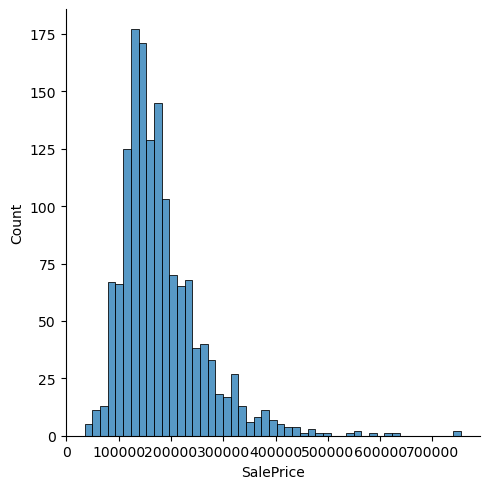

In [10]:
#Histogram
sns.displot(df["SalePrice"])

In [11]:
#Skewness and Kurtosis
skewness = df["SalePrice"].skew()
kurt = df["SalePrice"].kurt()
print(f"Skewness {skewness}")
print(f"Kurtosis {kurt}")

Skewness 1.8828757597682129
Kurtosis 6.536281860064529


<AxesSubplot:>

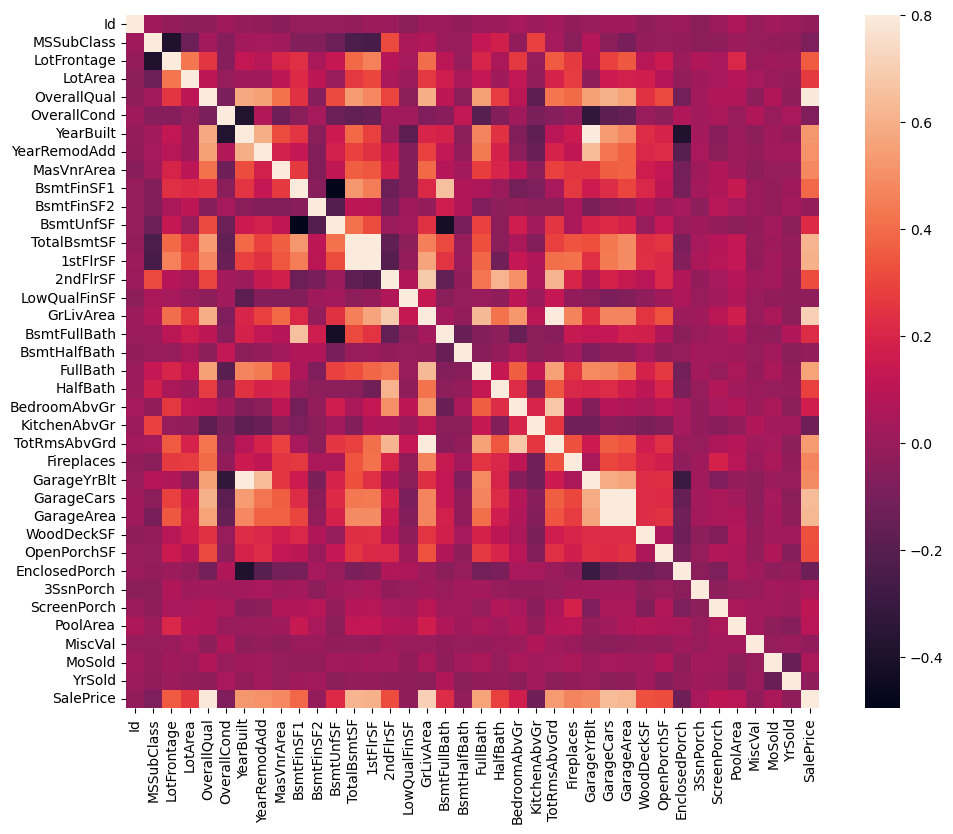

In [12]:
corr = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True)

At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.

[[1.         0.7909816  0.70862448 0.6404092  0.62343144 0.61358055
  0.60585218 0.56066376 0.53372316 0.52289733]
 [0.7909816  1.         0.59300743 0.60067072 0.56202176 0.5378085
  0.47622383 0.55059971 0.42745234 0.57232277]
 [0.70862448 0.59300743 1.         0.46724742 0.46899748 0.4548682
  0.56602397 0.63001165 0.82548937 0.19900971]
 [0.6404092  0.60067072 0.46724742 1.         0.88247541 0.43458483
  0.43931681 0.46967204 0.36228857 0.53785009]
 [0.62343144 0.56202176 0.46899748 0.88247541 1.         0.48666546
  0.48978165 0.40565621 0.33782212 0.47895382]
 [0.61358055 0.5378085  0.4548682  0.43458483 0.48666546 1.
  0.81952998 0.32372241 0.28557256 0.391452  ]
 [0.60585218 0.47622383 0.56602397 0.43931681 0.48978165 0.81952998
  1.         0.38063749 0.40951598 0.28198586]
 [0.56066376 0.55059971 0.63001165 0.46967204 0.40565621 0.32372241
  0.38063749 1.         0.55478425 0.46827079]
 [0.53372316 0.42745234 0.82548937 0.36228857 0.33782212 0.28557256
  0.40951598 0.5547842

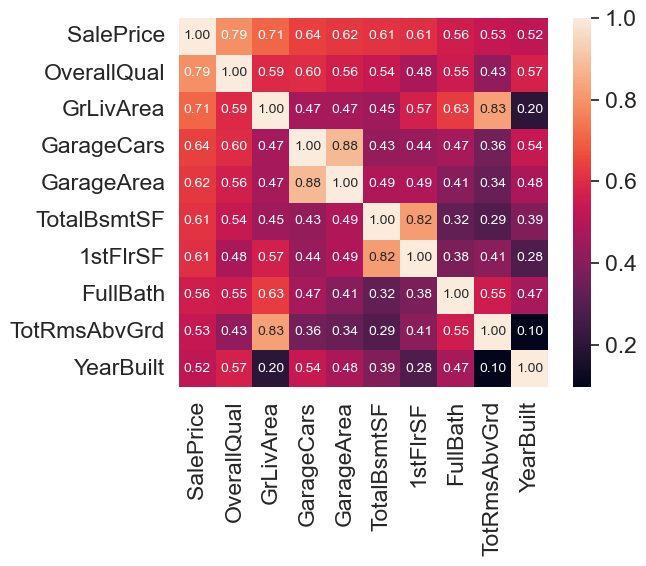

In [13]:
#'SalePrice' correlation matrix
k = 10

columns = corr.nlargest(k, "SalePrice")["SalePrice"].index

cm = np.corrcoef(df[columns].values.T)
print(cm)
sns.set(font_scale=1.5)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
plt.show()



'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!<br>


'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).<br>

'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was righ<br>

'TotRmsAbvGrd' and 'GrLivArea', twin brothers again


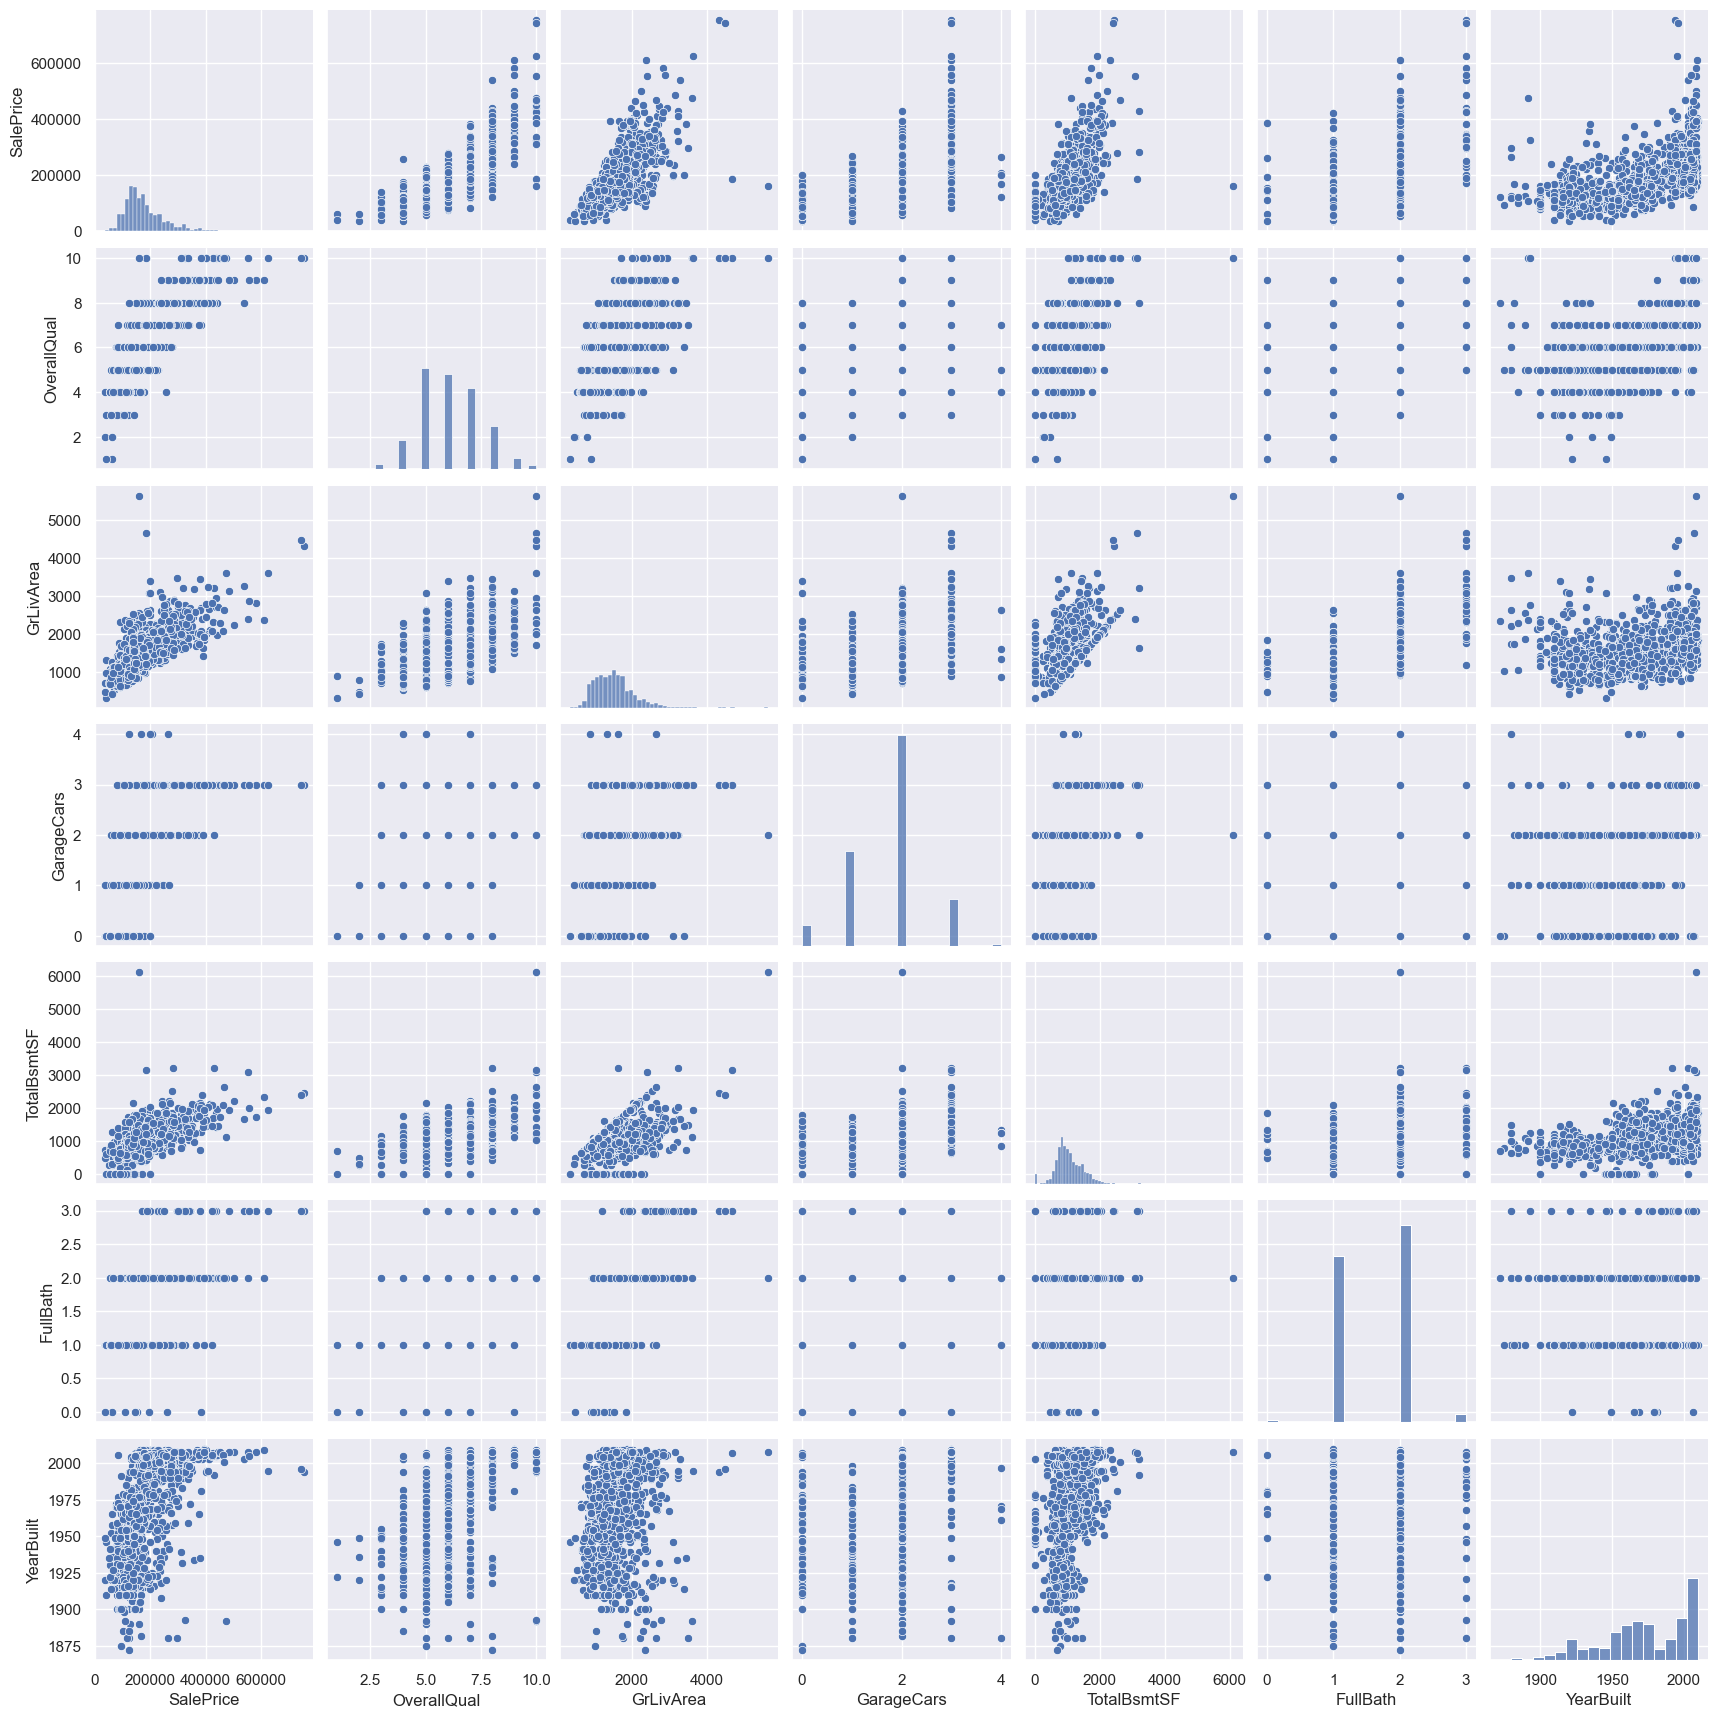

In [14]:
#Scatter plots between 'SalePrice' and correlated variables
sns.set()
features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[features], height=2.5)
plt.show()

This mega scatter plot gives us a reasonable idea about variables relationships. One of the figures we may find interesting is the one between 'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker). The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative). We can also see this same tendency in the upper limit of the 'dots cloud' (be even more creative). Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).

<h4>Missing Values </h4>

<AxesSubplot:>

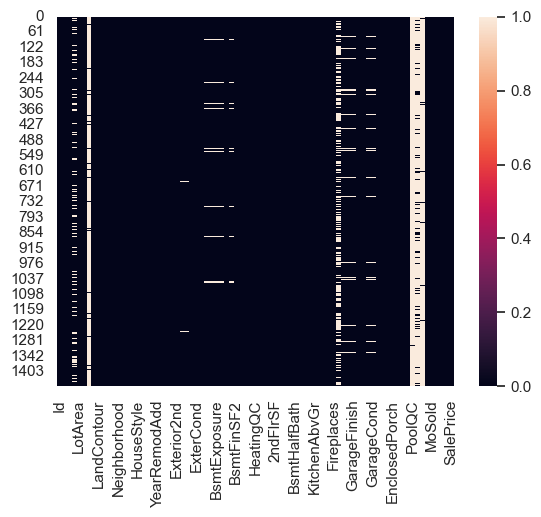

In [15]:
#fig, ax = plt.subplots(figsize=(12,6))
#sns.heatmap(df.isnull(), annot=True, fmt="d", linewidths=.5, ax=ax)
sns.heatmap(df.isnull())

In [16]:
#listing all the missing features 
missing_features = [features for features in df.columns if df[features].isnull().sum() > 1]
print(len(missing_features))
print(missing_features)


18
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [17]:
df.index

RangeIndex(start=0, stop=1460, step=1)

LotFrontage has 17.74 % missing values
Alley has 93.77 % missing values
MasVnrType has 0.55 % missing values
MasVnrArea has 0.55 % missing values
BsmtQual has 2.53 % missing values
BsmtCond has 2.53 % missing values
BsmtExposure has 2.6 % missing values
BsmtFinType1 has 2.53 % missing values
BsmtFinType2 has 2.6 % missing values
FireplaceQu has 47.26 % missing values
GarageType has 5.55 % missing values
GarageYrBlt has 5.55 % missing values
GarageFinish has 5.55 % missing values
GarageQual has 5.55 % missing values
GarageCond has 5.55 % missing values
PoolQC has 99.52 % missing values
Fence has 80.75 % missing values
MiscFeature has 96.3 % missing values


Text(0.5, 1.0, 'Percent missing data by feature')

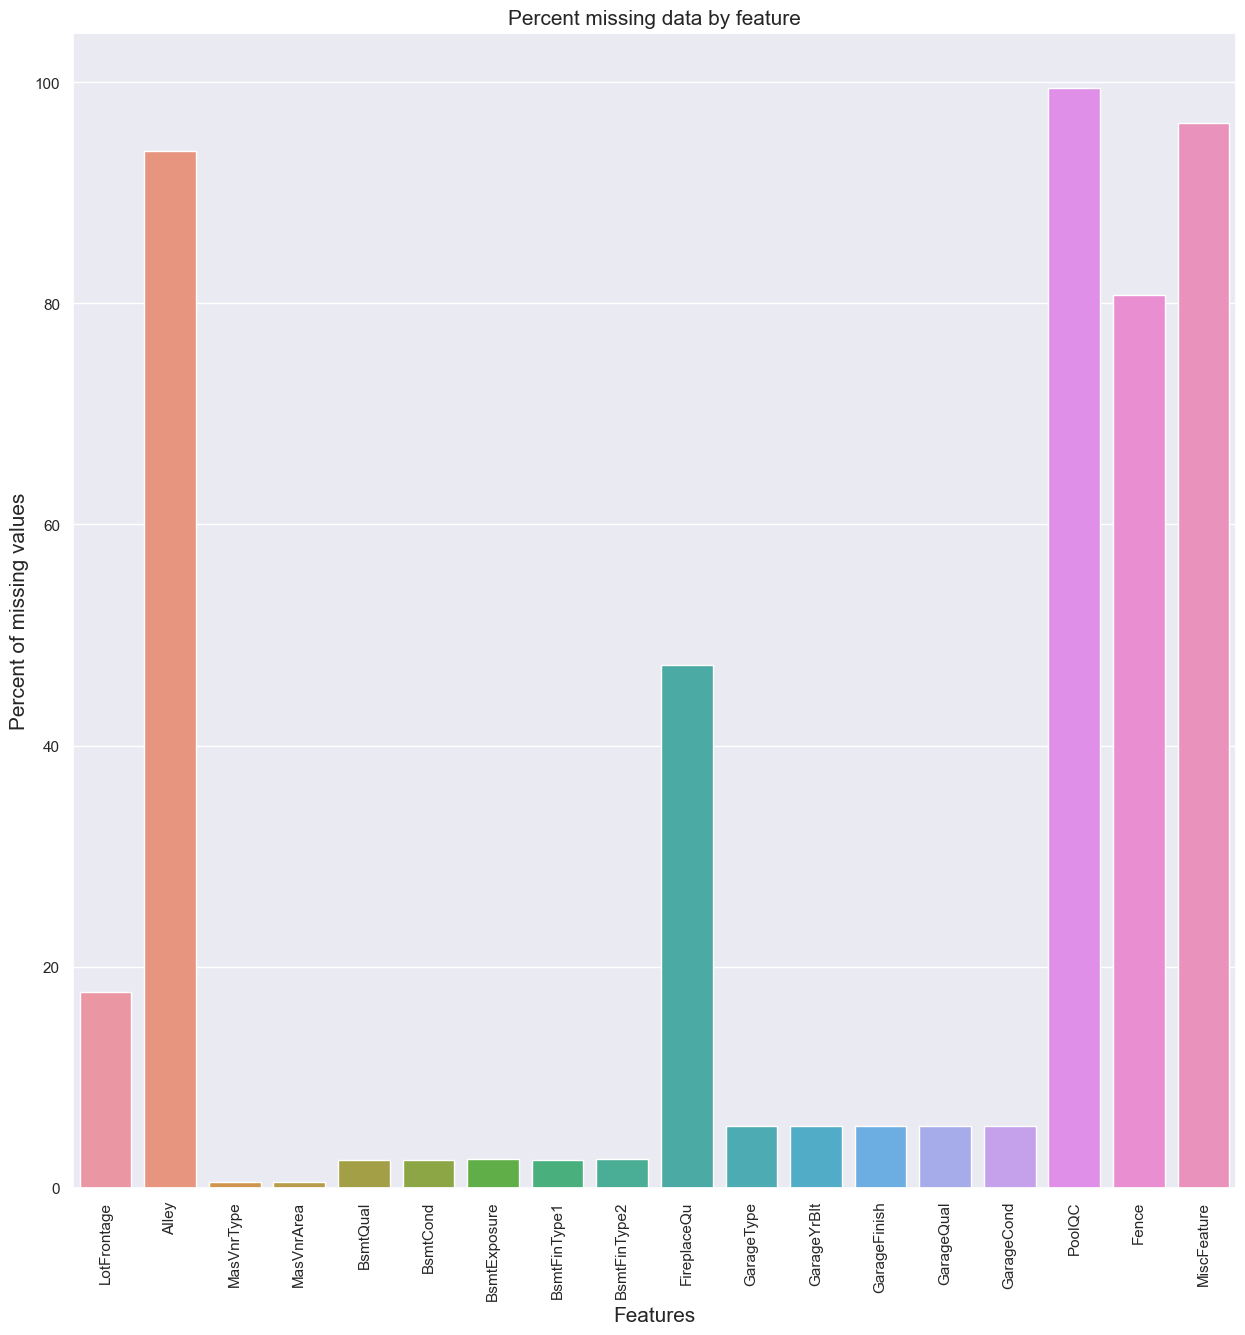

In [18]:
x = []
y = []
for features in missing_features:
    x.append(features)
    nums = np.round(df[features].isnull().mean()*100, 2)
    y.append(nums)
    print(features, "has", np.round(df[features].isnull().mean()*100, 2),"% missing values")
missing_tables = pd.DataFrame({
    "Features":x,
    "Values":y
})
missing_tables.head()

f, ax = plt.subplots(figsize=(15, 15))
plt.xticks(rotation='90')




sns.barplot(x = missing_tables["Features"], y = missing_tables["Values"])

plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

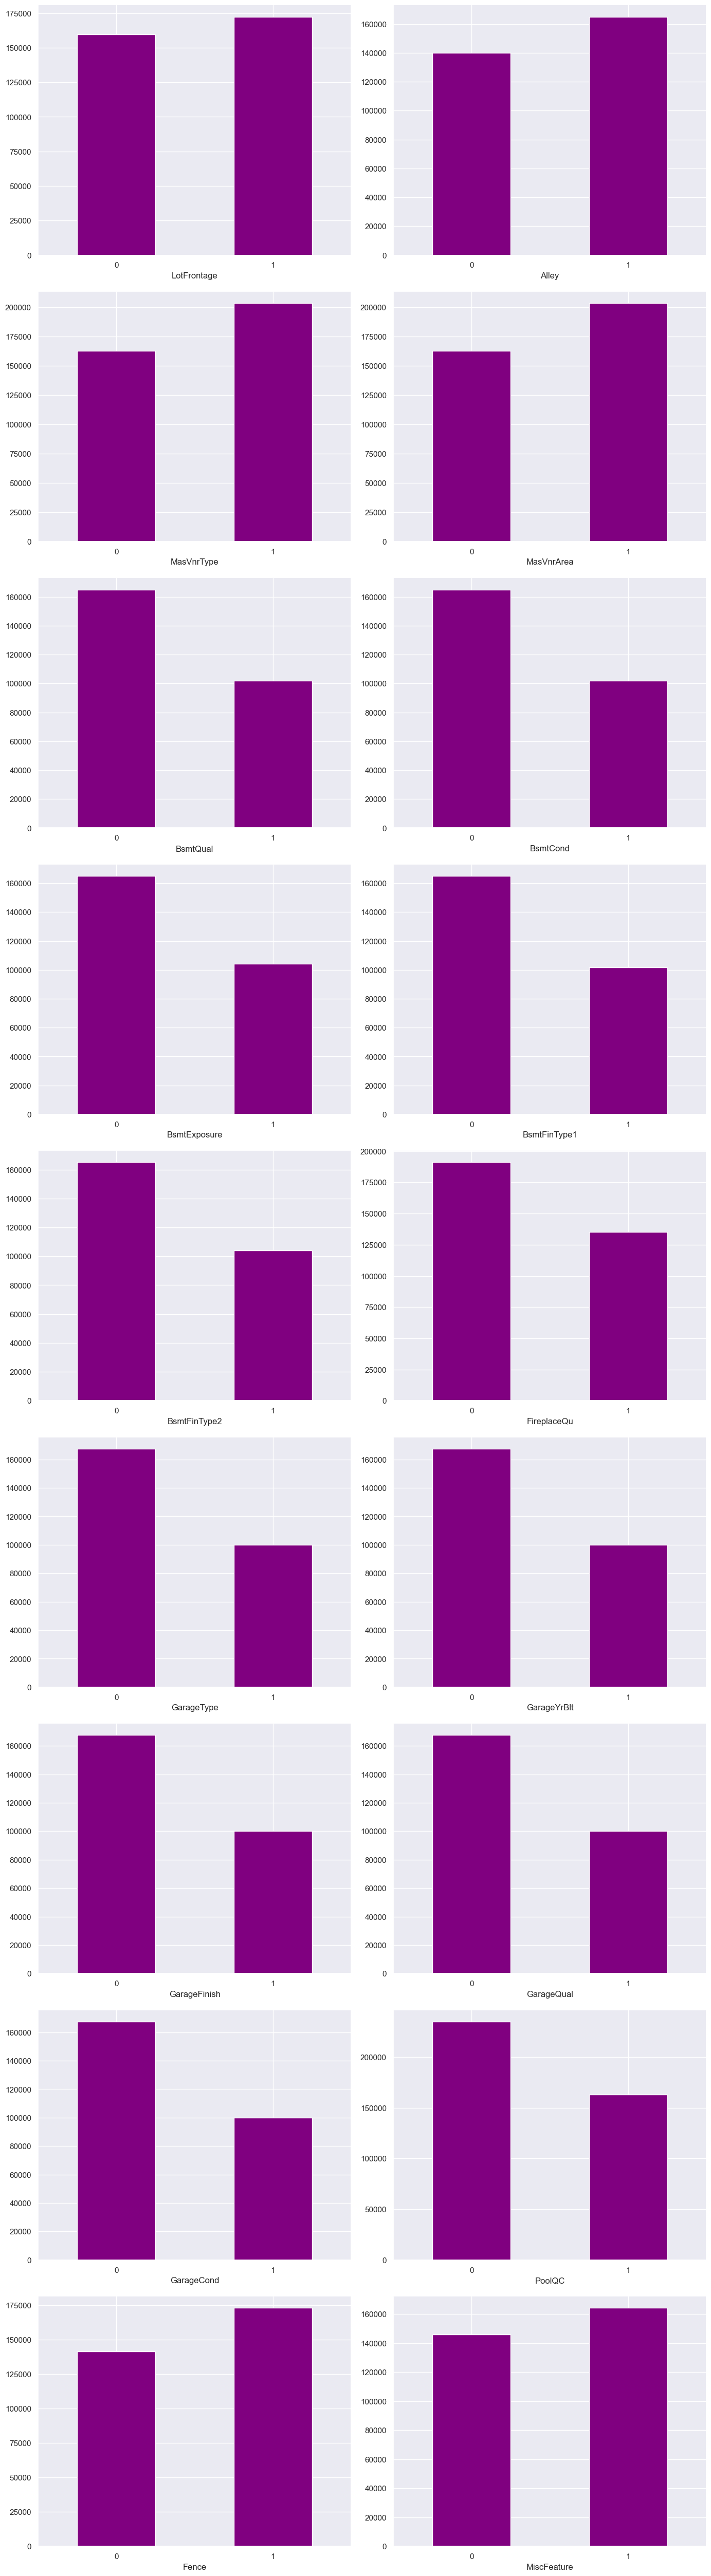

In [19]:
fig = plt.figure(figsize=(14, 100))

a = len(missing_features)
b = 2 
c=1 

data = df.copy()

for features in missing_features:
    # If null found, then 1, or 0

    data[features] = np.where(data[features].isnull(), 1, 0)

    plt.subplot(a, b, c)

    data.groupby(features)["SalePrice"].median().plot.bar(color="purple")

    plt.xticks(rotation=0)

    c+=1

fig.tight_layout()
plt.show()



Here, Price is higher for such missing values of the features Lot Frontage ,Alley, MasVnrType, MasVnrArea, Electrical, Fence, Misc Features
And Price is lower for missing values of the features Bsmt Quality, Bsmt Condition, Bsmt Exposure, Bsmt FinType 1, Bsmt FinType 2, Fireplace Quality, Garage Type, Garage YrBuilt, Garage Finish, Garage Quality, Garage Condition, Pool QC

<h4> Numerical Features </h4>

In [20]:
numerical_features = [features for features in df.columns if df[features].dtype != "O" and features!= "Id"]
print(numerical_features)
print("\n".join(str(i) for i in numerical_features))

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice


In [21]:
#Features like Year is Temporal Variables, we need to extract those
yr = ["year", "YEAR", "yr", "YR", "Year"]
temporal_variable = [i for i in numerical_features for j in yr if j in i.lower()]
print(temporal_variable)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


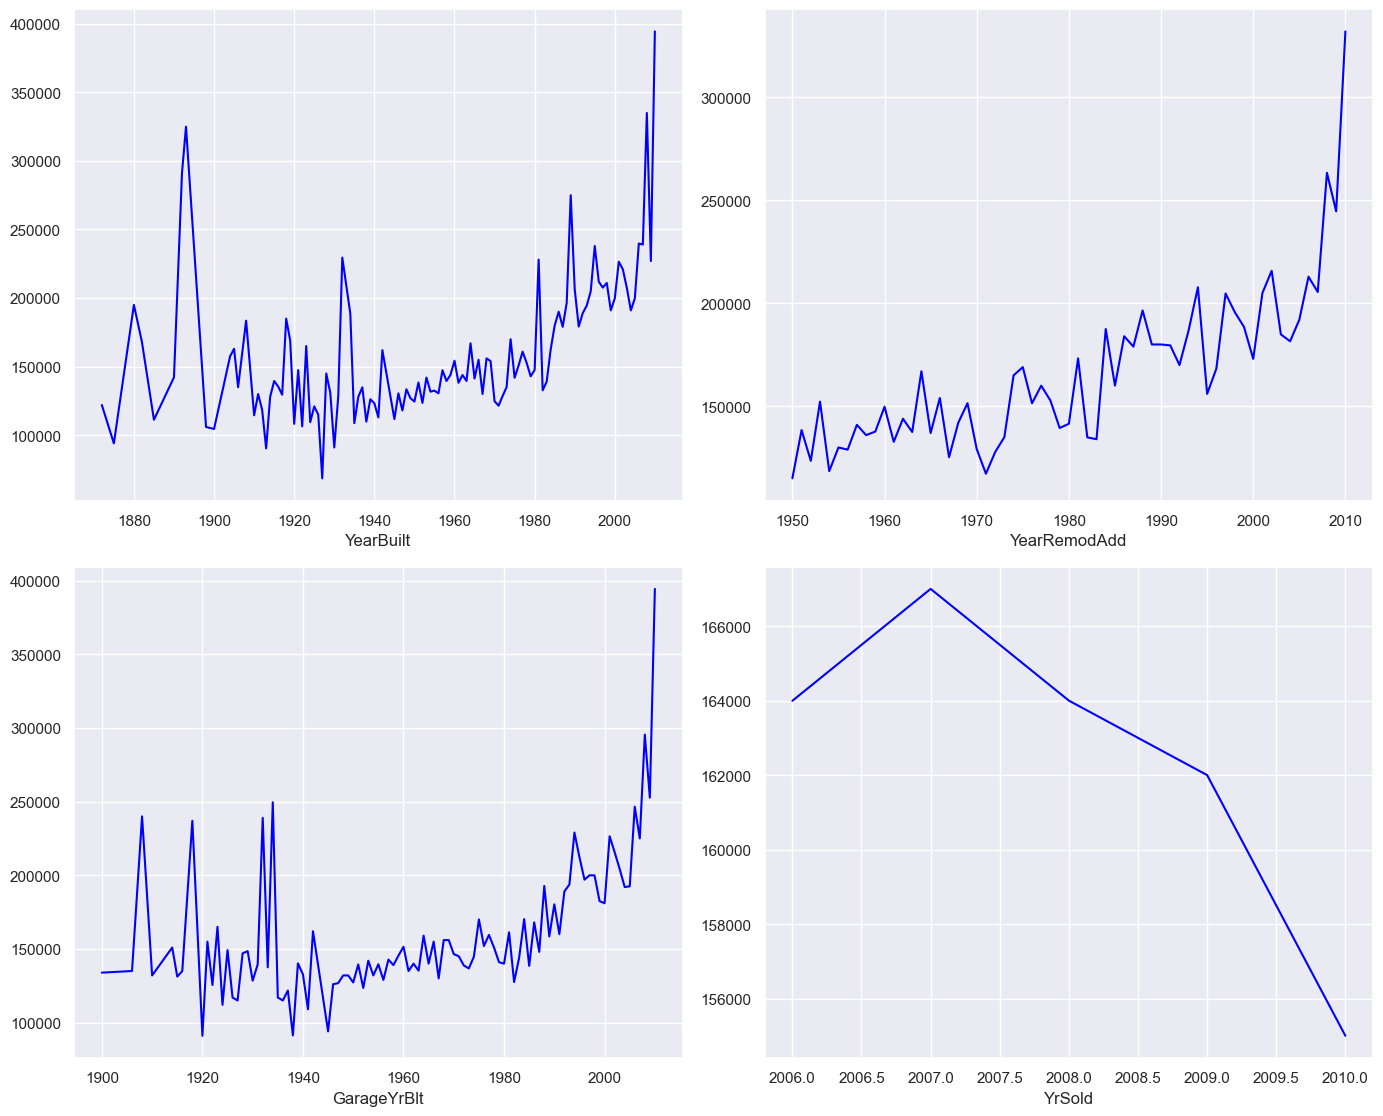

In [22]:
fig = plt.figure(figsize=(14, 22))       


a = len(temporal_variable)
b=2 
c=1 

data = df.copy()

for features in temporal_variable:

    plt.subplot(a, b, c)

    data.groupby(features)["SalePrice"].median().plot(color="blue")
    plt.xticks(rotation=0)

    c+=1

fig.tight_layout()
plt.show()

As we can see there is an incremental growth in price as the years keep increasing where as with year sold the price is decreasing. Maybe the house getting older that's why

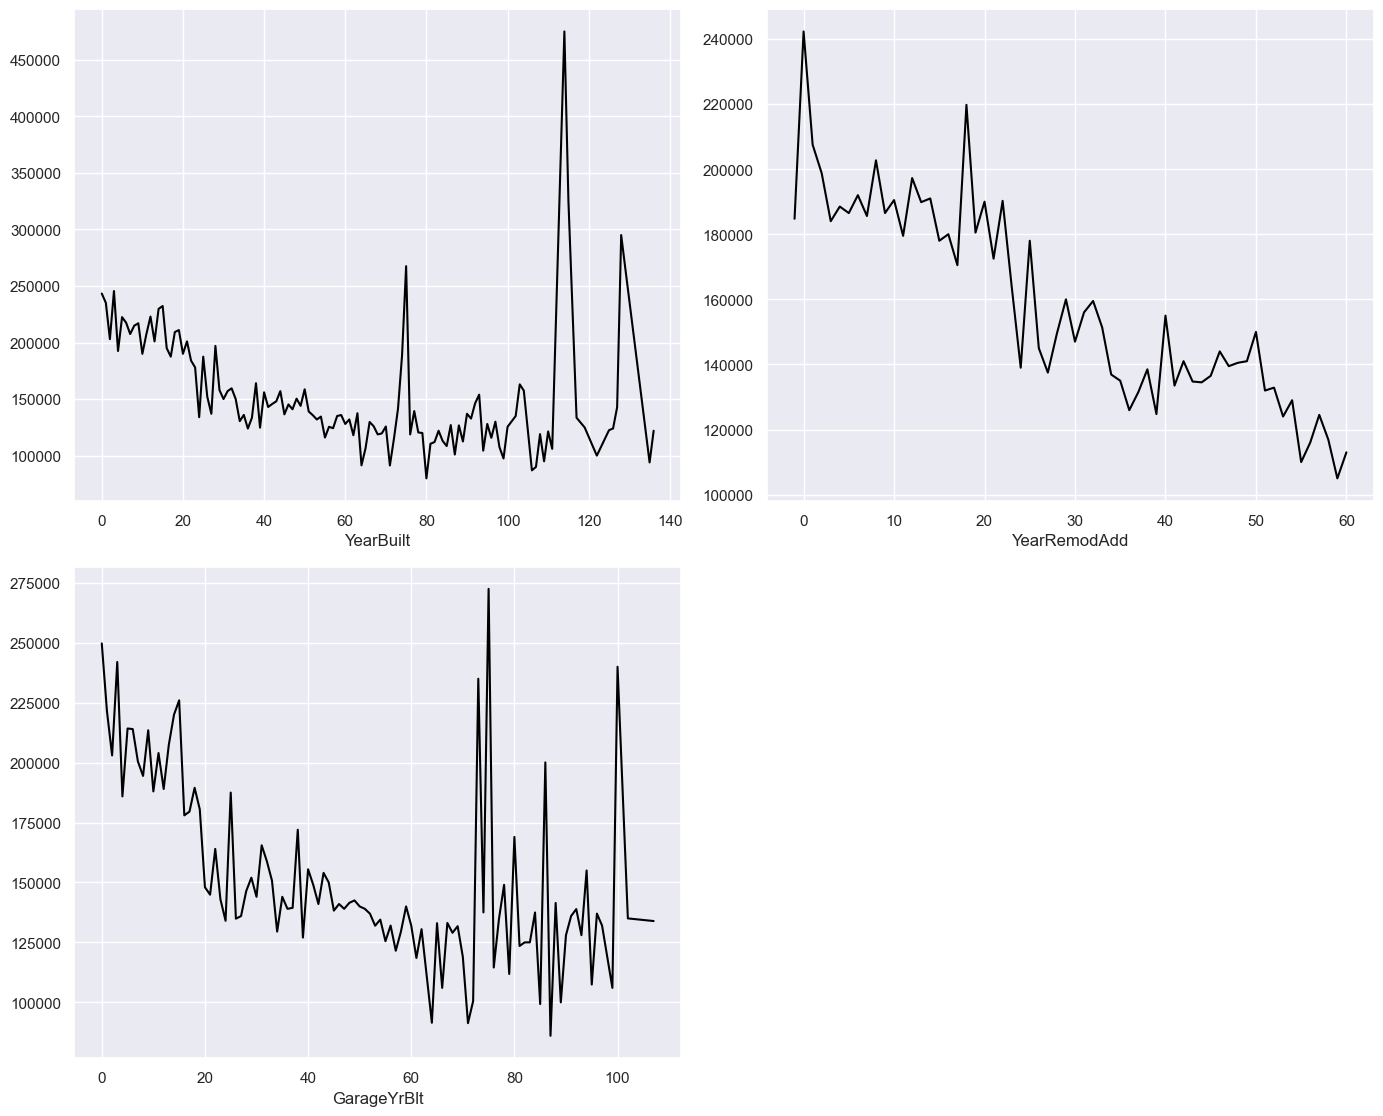

In [23]:
fig = plt.figure(figsize=(14, 22))       


a = len(temporal_variable)
b=2 
c=1 

data = df.copy()

for features in temporal_variable:

    if features != "YrSold":



        plt.subplot(a, b, c)
        data[features] = data["YrSold"] - data[features]
        data.groupby(features)["SalePrice"].median().plot(color="black")
        plt.xticks(rotation=0)

        c+=1

fig.tight_layout()
plt.show()

This proves our finding that the Sale Price is decreasing as the age of the houses are increasing

(-0.5, 111.5, 0.0, 1000000.0)

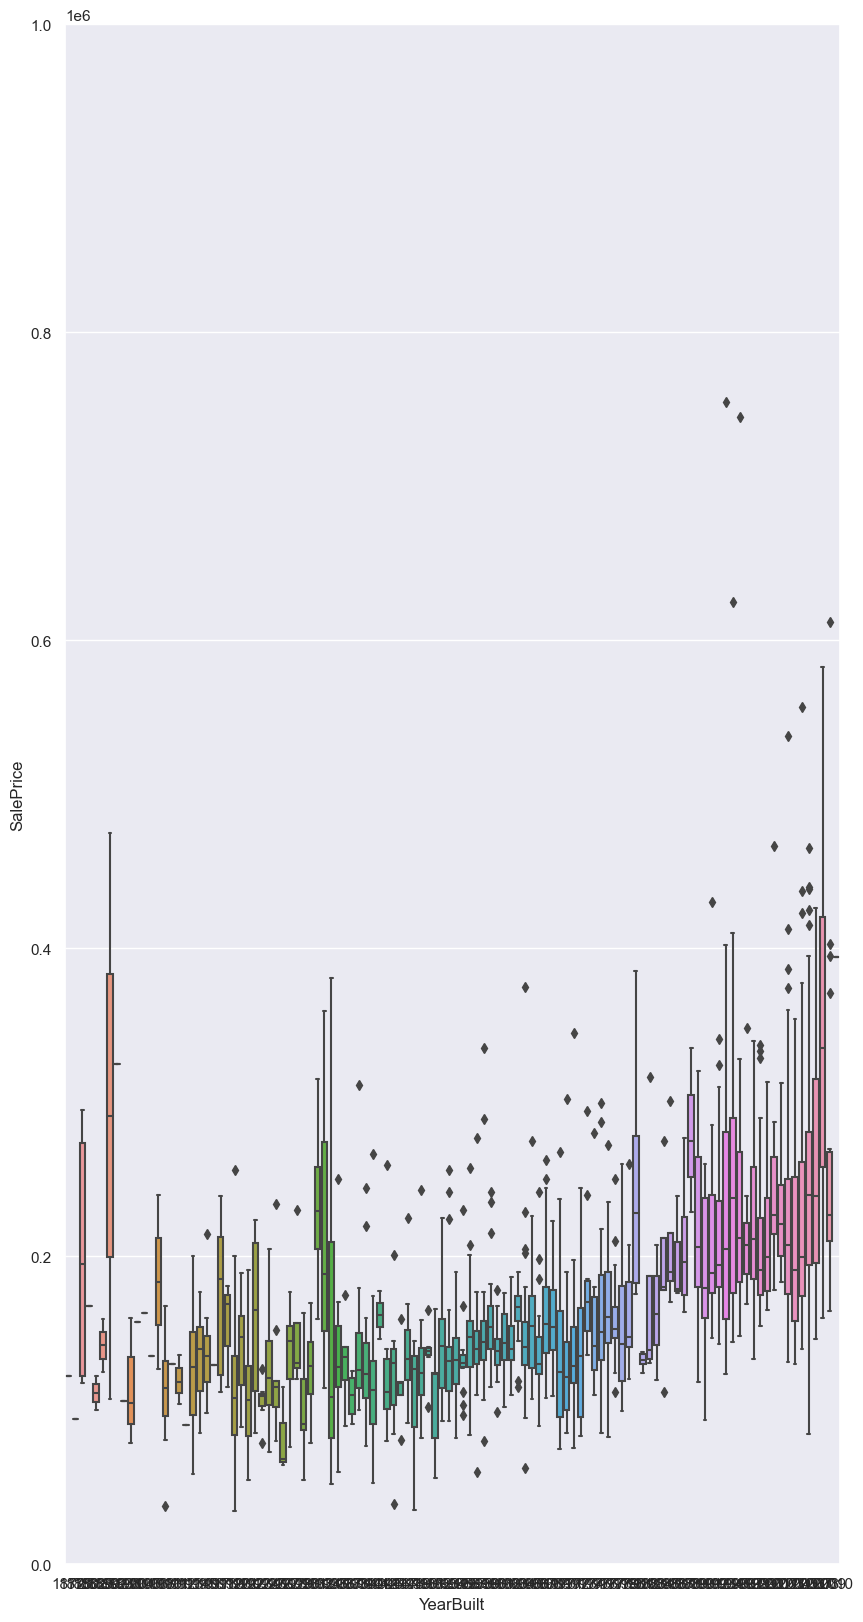

In [24]:
#boxplot YearBuilt and salesprice
data_overallsales = pd.concat([df["YearBuilt"], df["SalePrice"]], axis=1)
fig = plt.subplots(figsize=(10, 20))
figure = sns.boxplot(x="YearBuilt", y="SalePrice", data=data_overallsales)
figure.axis(ymin=0, ymax=1000000)

(-0.5, 9.5, 0.0, 1000000.0)

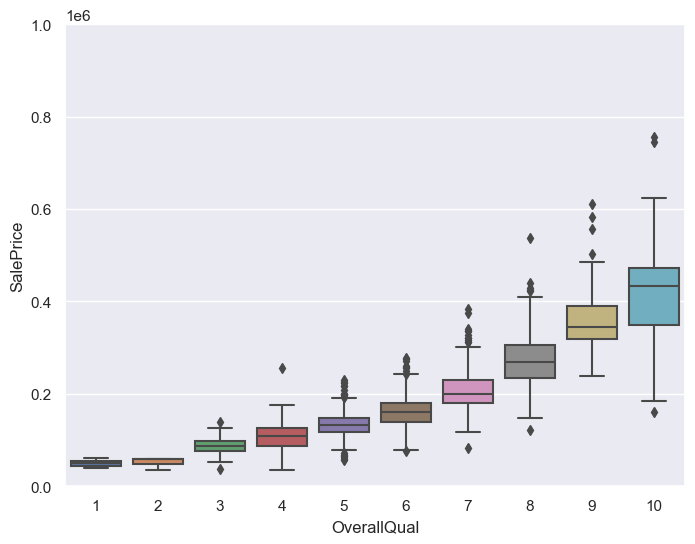

In [25]:
#boxplot OverallQual and salesprice
data_overallsales = pd.concat([df["OverallQual"], df["SalePrice"]], axis=1)
fig = plt.subplots(figsize=(8, 6))
figure = sns.boxplot(x="OverallQual", y="SalePrice", data=data_overallsales)
figure.axis(ymin=0, ymax=1000000)

<h4> Categorical Features </h4>

In [26]:
categorical_features = [features for features in df.columns if df[features].dtype == 'O']
print(categorical_features)
print("\n".join(str(i) for i in categorical_features))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscF

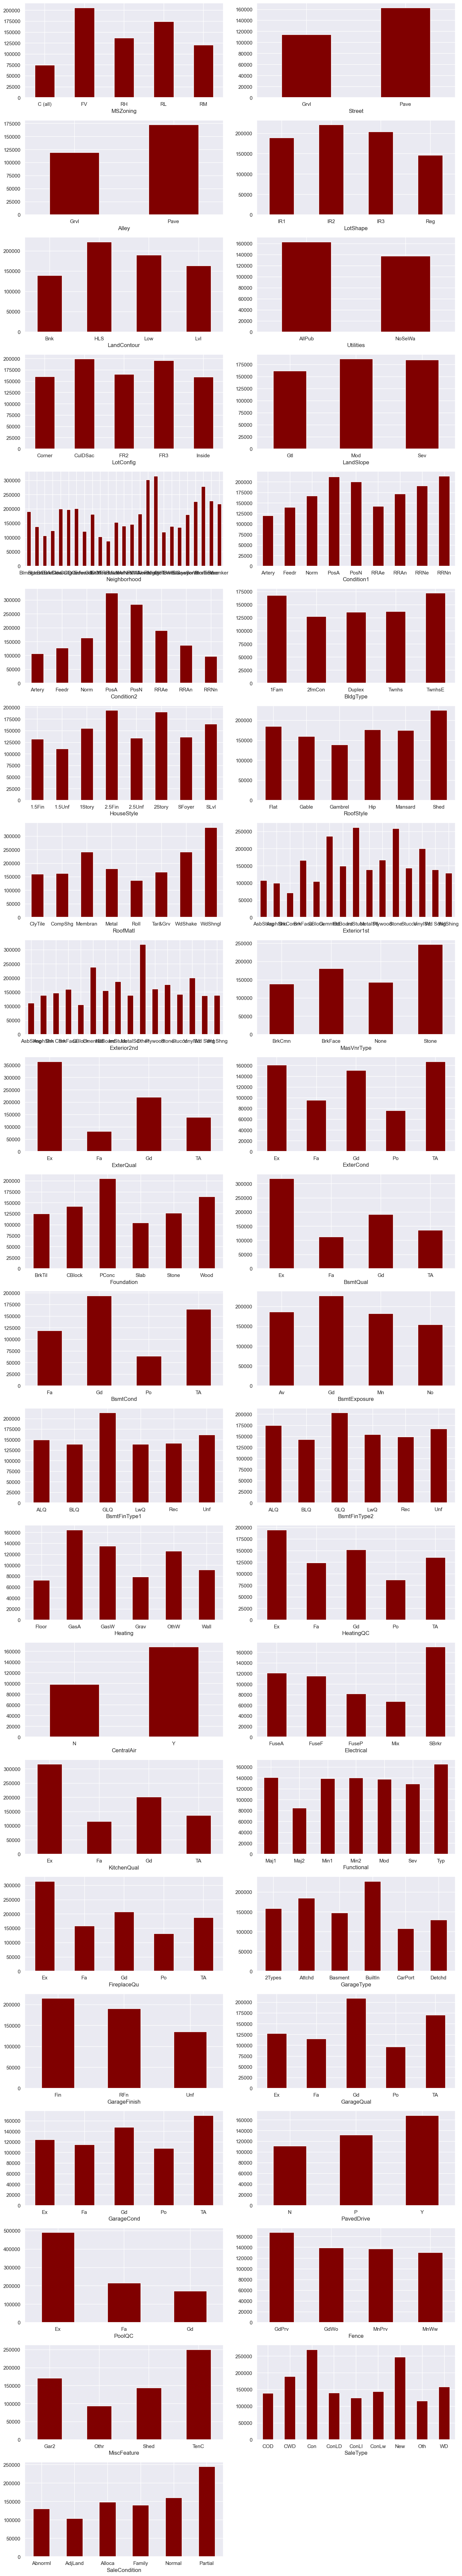

In [27]:
fig = plt.figure(figsize=(14, 150))       


a = len(categorical_features)
b=2 
c=1 

data = df.copy()

for features in categorical_features:

    plt.subplot(a, b, c)

    data.groupby(features)["SalePrice"].median().plot.bar(color="maroon")
    plt.xticks(rotation=0)

    c+=1

fig.tight_layout()
plt.show()

<h4> Discreate Features </h4>

In [28]:
#numerical_features
print(len(df["MSSubClass"].unique()))

15


In [29]:
#we will take threshold as 30
discreate_features = [features for features in numerical_features if len(df[features].unique()) <25 and features not in temporal_variable and df[features].dtype!='O']
print(discreate_features)
print("Difference between numerical features and discreate features length is",len(numerical_features)-len(discreate_features))

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']
Difference between numerical features and discreate features length is 20


In [30]:
df["MSSubClass"].dtype

dtype('int64')

In [31]:
strings = 1
nums = 1
for features in discreate_features:
    
    if df[features].dtype == 'O':
        strings += 1 
        print(features)
    elif df[features].dtype == 'int64' or df[features].dtype == 'float64':
        nums += 1
        #print("Numerical value found!")
print("String value found", strings)
print("Numerical value found", nums)

String value found 1
Numerical value found 18


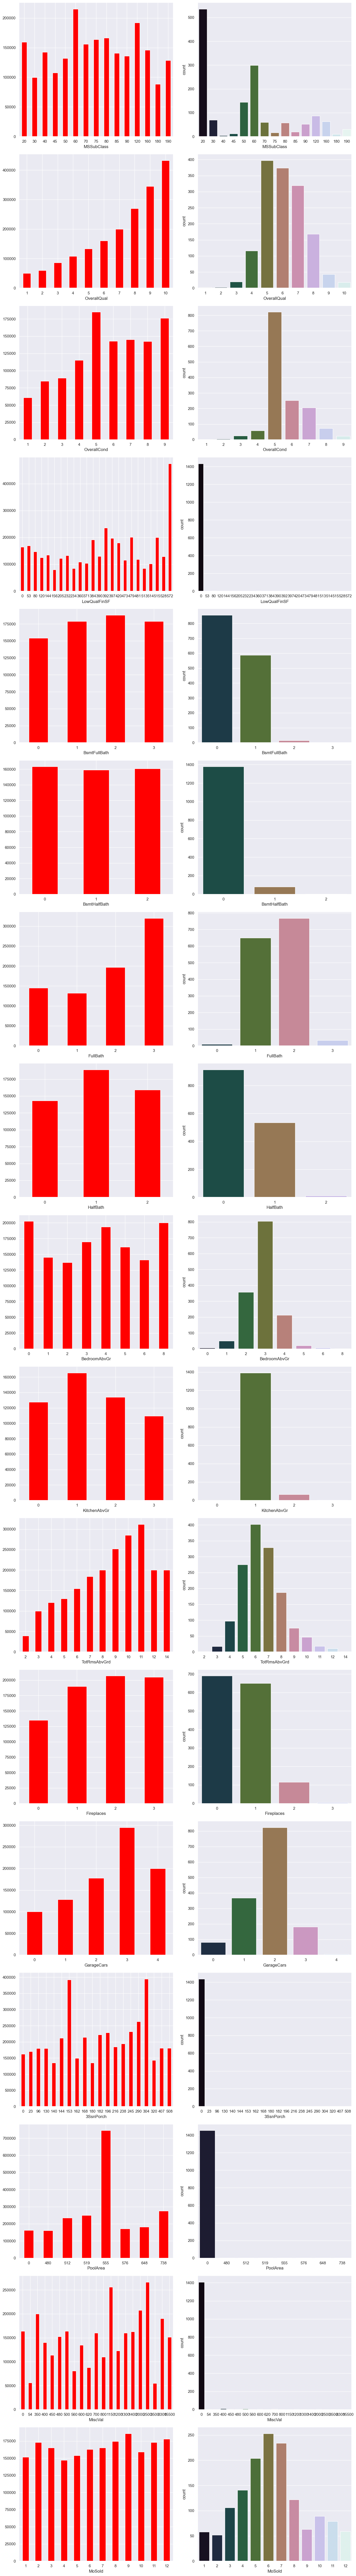

In [32]:
fig = plt.figure(figsize=(14, 100))

a = len(discreate_features)
b = 2 
c = 1
data = df.copy()
for features in discreate_features:

    plt.subplot(a, b, c)

    data.groupby(features)["SalePrice"].median().plot(kind="bar", color="red")
    plt.xticks(rotation=0)
    c += 1


    plt.subplot(a, b, c)
    #to check outliers
    sns.countplot(x=data[features], palette='cubehelix')
    c += 1


fig.tight_layout()
plt.show()

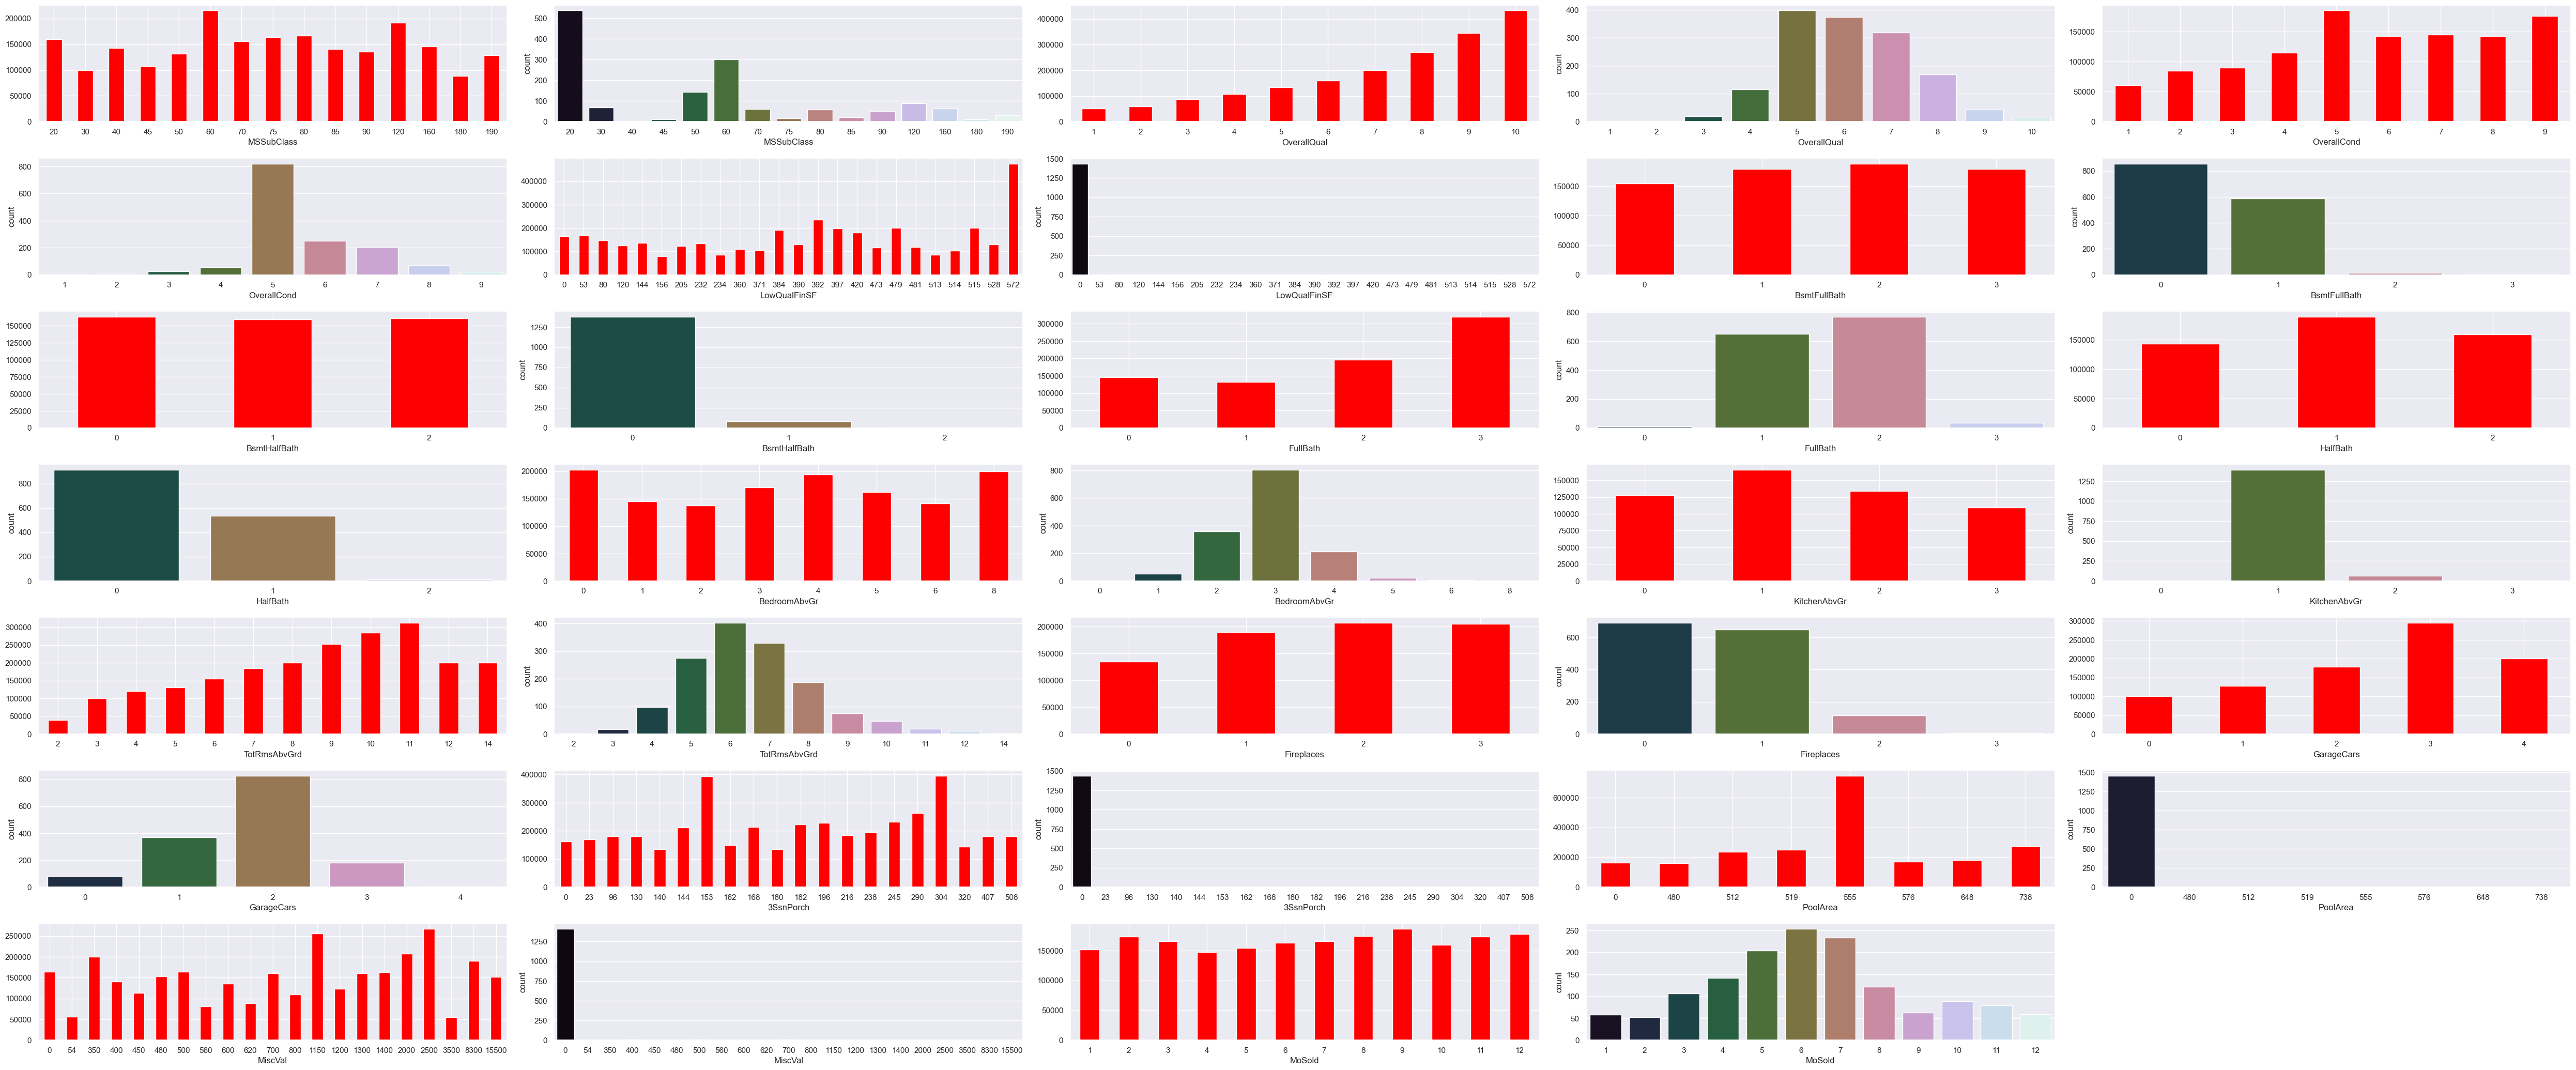

In [33]:
fig = plt.figure(figsize=(50, 50))

a = len(discreate_features)
b = 5 
c = 1
data = df.copy()
for features in discreate_features:

    plt.subplot(a, b, c)

    data.groupby(features)["SalePrice"].median().plot(kind="bar", color="red")
    plt.xticks(rotation=0)
    c += 1


    plt.subplot(a, b, c)
    #to check outliers
    sns.countplot(x=data[features], palette='cubehelix')
    c += 1


fig.tight_layout()
plt.show()

There is a clear monotonic relationship between between some features with SalePrice and the others have messy relationship. All the features do have a lot of outliers except MoSold.

<h3> Continuous Features </h3>

In [34]:
continuous_features = [features for features in numerical_features if features not in discreate_features+temporal_variable+['Id'] and df[features].dtype!="O"]
print(continuous_features)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


C:\Users\User\AppData\Local\Temp\ipykernel_12512\3387350863.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=data[features], kde=True, palette="viridis") #distribution
C:\Users\User\AppData\Local\Temp\ipykernel_12512\3387350863.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=data[features], kde=True, palette="viridis") #distribution
C:\Users\User\AppData\Local\Temp\ipykernel_12512\3387350863.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=data[features], kde=True, palette="viridis") #distribution
C:\Users\User\AppData\Local\Temp\ipykernel_12512\3387350863.py:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=data[features], kde=True, palette="viridis") #distribution
C:\Users\User\AppData\Local\Temp\ipykernel_12512\3387350863.py:11: UserWarning: Ignoring `palette` because no `hue` vari

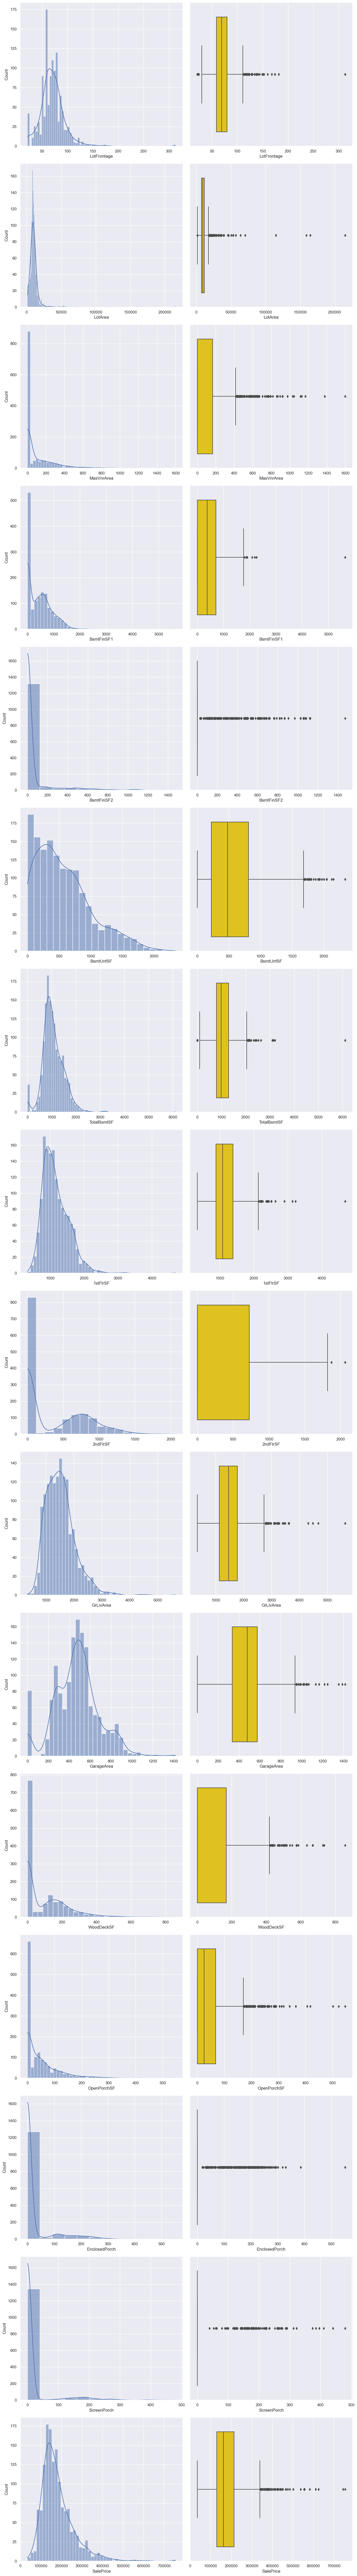

In [35]:
fig = plt.figure(figsize=(14, 100))
a = len(continuous_features)
b = 2 
c = 1 

data = df.copy()

for features in continuous_features:
    plt.subplot(a, b, c)

    sns.histplot(x=data[features], kde=True, palette="viridis") #distribution

    c += 1 

    plt.subplot(a, b, c)

    sns.boxplot(x=data[features], color="gold")

    c+=1 


fig.tight_layout()
plt.show()


The data is right skewed with all the features having outliers. We need to perform log normal transformation on these features.

d:\Anaconda\envs\pytorch\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


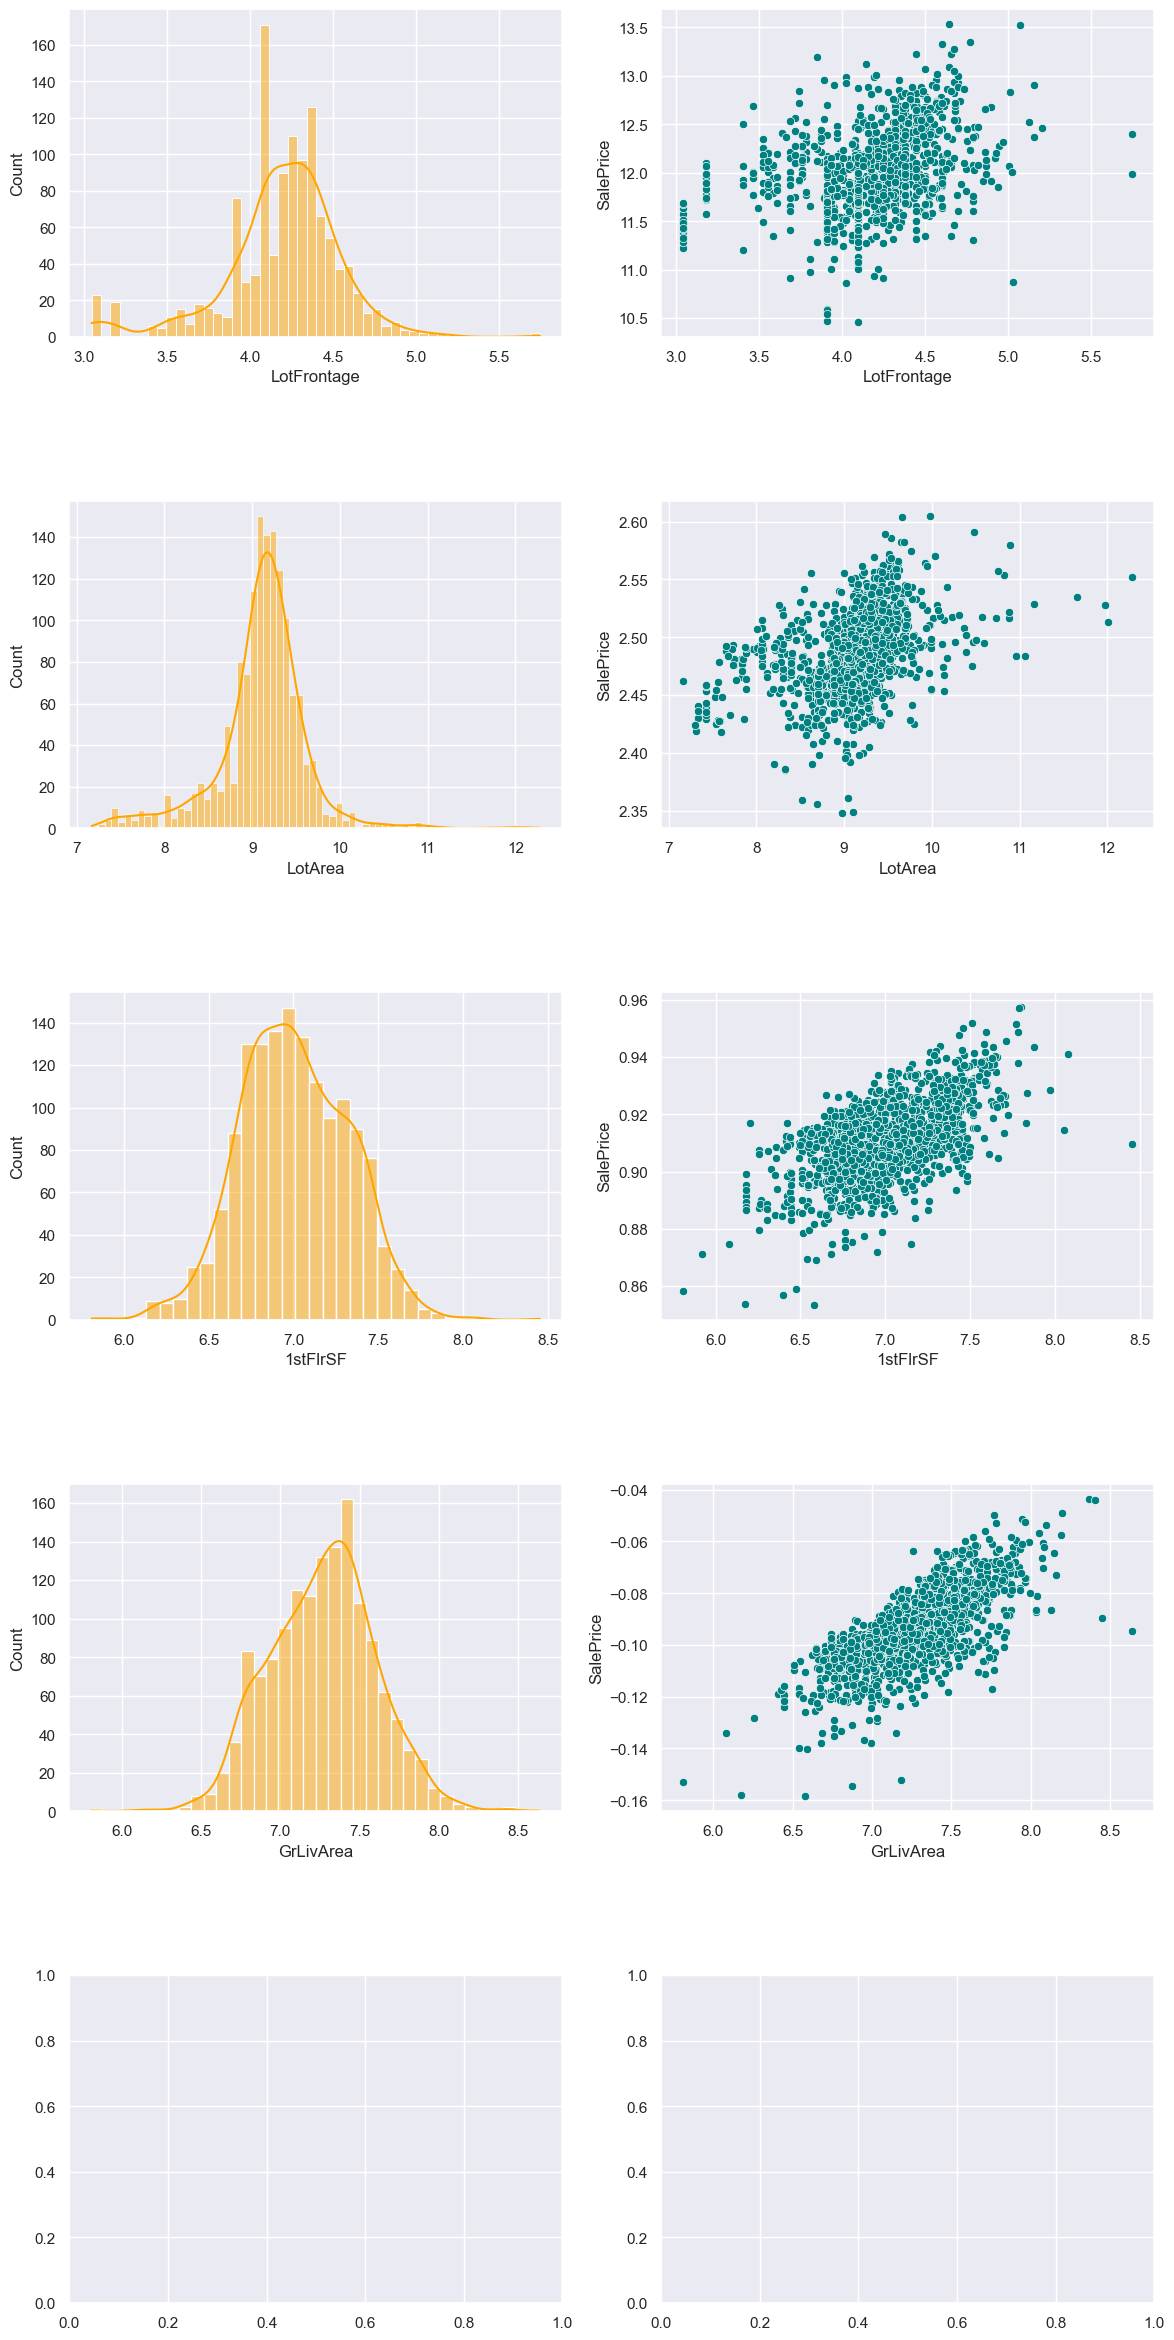

In [36]:
fig = plt.figure(figsize=(14, 100))
a = len(continuous_features) 
b = 2
c = 1 

data = df.copy()

for features in continuous_features:
    if 0 in data[features].unique():
        continue 
    else: 
        plt.subplot(a, b, c)
        data[features] = np.log(data[features])

        sns.histplot(x=data[features], kde=True, color="orange") #distribution

        c += 1 

        plt.subplot(a, b, c)
        data["SalePrice"] = np.log(data["SalePrice"])
        sns.scatterplot(x=data[features], y=data["SalePrice"], color="teal")

        c+=1 
    if c >= a*b:
        break 


#fig.tight_layout()
fig.subplots_adjust(hspace=0.5)
plt.show()


After applying log normal distribution we can conclude that there is somewhat of a linear relationship between continious features and Sale Price

<h3> Feature Engineering </h3>

In [37]:
temp = X_test.copy()

In [38]:
temp.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

<AxesSubplot:>

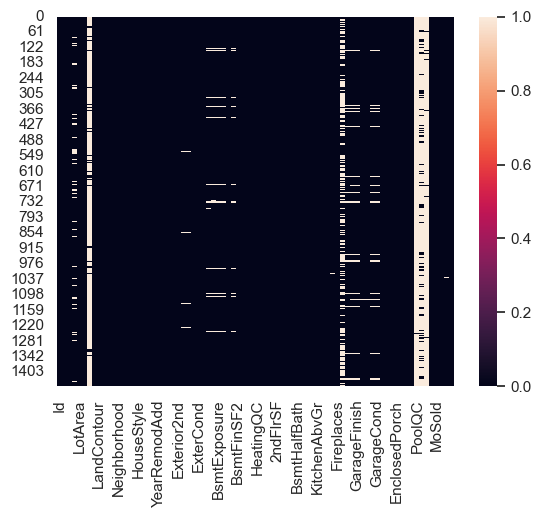

In [39]:
sns.heatmap(temp.isnull())

In [40]:
missing_categorical = [features for features in df.columns if df[features].isnull().sum() > 0 and df[features].dtype =="O"]
missing_categorical_temp = [features for features in temp.columns if temp[features].isnull().sum() > 0 and temp[features].dtype =="O"]
print(missing_categorical)
print(missing_categorical_temp)

print("Training Categorical Null Values---------------------------------------------")
for features in missing_categorical:
    print(features, "has", np.round(df[features].isnull().mean()*100, 2),"% missing values")
print("\n\n\n")
print("Testing Categorical Null Values---------------------------------------------")
for features in missing_categorical_temp:
    print(features, "has", np.round(df[features].isnull().mean()*100, 2),"% missing values")

['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']
Training Categorical Null Values---------------------------------------------
Alley has 93.77 % missing values
MasVnrType has 0.55 % missing values
BsmtQual has 2.53 % missing values
BsmtCond has 2.53 % missing values
BsmtExposure has 2.6 % missing values
BsmtFinType1 has 2.53 % missing values
BsmtFinType2 has 2.6 % missing values
Electrical has 0.07 % missing values
FireplaceQu has 47.26 % missing values
GarageType has 5.55 % missing values
GarageFinish has 5.55 % missing values

In [41]:
#Replace missing Categorical Values
def replace_categorical_value(table, missing_array):
    data = table.copy()
    
    data[missing_array] = data[missing_array].fillna("missing")

    return data 

df = replace_categorical_value(df, missing_categorical)
temp = replace_categorical_value(temp, missing_categorical_temp)

<AxesSubplot:>

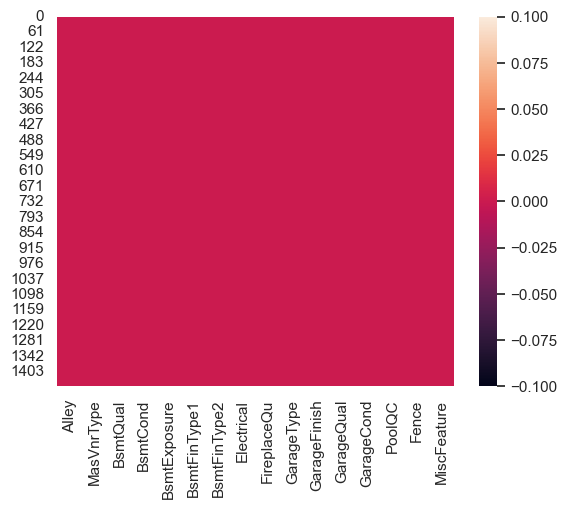

In [42]:
sns.heatmap(df[missing_categorical].isnull())

<AxesSubplot:>

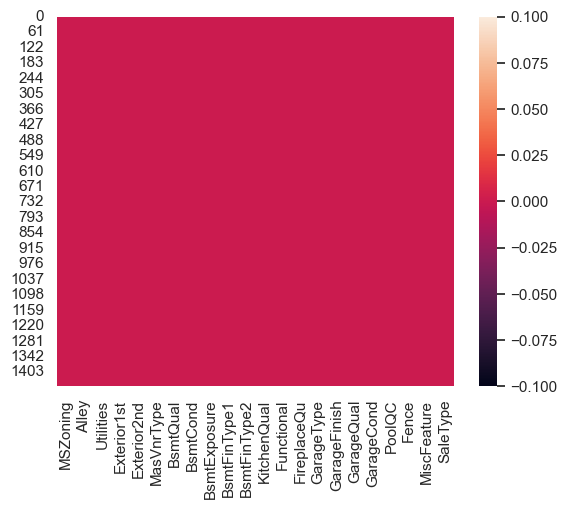

In [43]:
sns.heatmap(temp[missing_categorical_temp].isnull())

In [44]:
#Missing Numerical Features
missing_numerical = [features for features in numerical_features if df[features].isnull().sum() > 0 and df[features].dtype != "O"]
missing_numerical_temp = [features for features in temp.columns if temp[features].isnull().sum() > 0 and temp[features].dtype != "O"]
print(missing_features)
print(missing_numerical_temp)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']


In [45]:
def missing_numerical_filling(dataset, feature):

    for features in feature:
        dataset[features]= dataset[features].fillna(dataset[features].median())

    return dataset 

<AxesSubplot:>

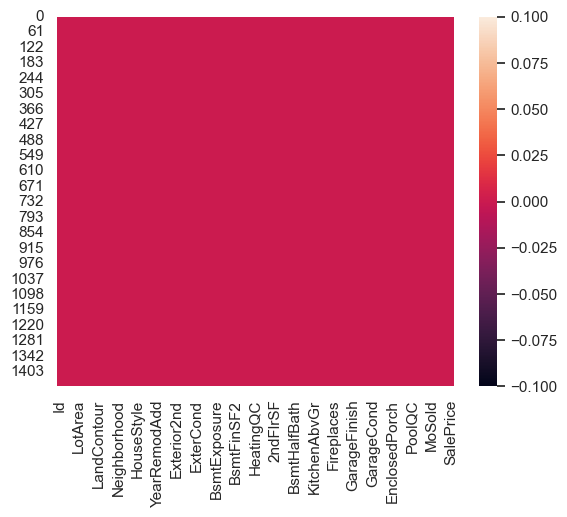

In [46]:
df = missing_numerical_filling(df, missing_numerical)
sns.heatmap(df.isnull())

<AxesSubplot:>

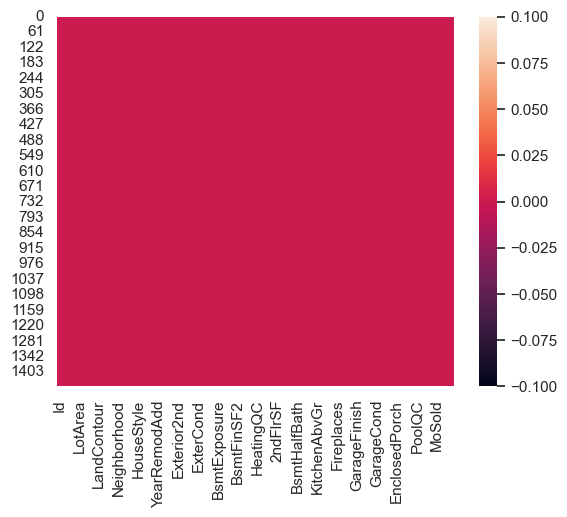

In [47]:
temp = missing_numerical_filling(temp, missing_numerical_temp)
sns.heatmap(temp.isnull())

In [48]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [49]:
#dropping ID column
df = df.drop("Id", axis=1)
temp = temp.drop("Id", axis=1)

In [50]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0          60       RL         65.0     8450   Pave  missing      Reg   
1          20       RL         80.0     9600   Pave  missing      Reg   
2          60       RL         68.0    11250   Pave  missing      IR1   
3          70       RL         60.0     9550   Pave  missing      IR1   
4          60       RL         84.0    14260   Pave  missing      IR1   

  LandContour Utilities LotConfig  ... PoolArea   PoolQC    Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0  missing  missing     missing   
1         Lvl    AllPub       FR2  ...        0  missing  missing     missing   
2         Lvl    AllPub    Inside  ...        0  missing  missing     missing   
3         Lvl    AllPub    Corner  ...        0  missing  missing     missing   
4         Lvl    AllPub       FR2  ...        0  missing  missing     missing   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [51]:
temp.head()

MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0          20       RH         80.0    11622   Pave  missing      Reg   
1          20       RL         81.0    14267   Pave  missing      IR1   
2          60       RL         74.0    13830   Pave  missing      IR1   
3          60       RL         78.0     9978   Pave  missing      IR1   
4         120       RL         43.0     5005   Pave  missing      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea   PoolQC    Fence  \
0         Lvl    AllPub    Inside  ...         120        0  missing    MnPrv   
1         Lvl    AllPub    Corner  ...           0        0  missing  missing   
2         Lvl    AllPub    Inside  ...           0        0  missing    MnPrv   
3         Lvl    AllPub    Inside  ...           0        0  missing  missing   
4         HLS    AllPub    Inside  ...         144        0  missing  missing   

  MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0     missing       0       6    2010        WD         Normal  
1        Gar2   12500       6    2010        WD         Normal  
2     missing       0       3    2010        WD         Normal  
3     missing       0       6    2010        WD         Normal  
4     missing       0       1    2010        WD         Normal  

[5 rows x 79 columns]

<h3> Log Normal Transformations </h3>

In [52]:
log_transform = [features for features in numerical_features if features not in temporal_variable and df[features].dtype != "O"]
print(log_transform)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SalePrice']


In [53]:
def log_normal(df, arrays):

    for array in arrays: 
        if 0 in df[array].unique():
            pass
        else:
            df[array] = np.log(df[array])    

    return df 

In [54]:
df = log_normal(df, log_transform)

In [55]:
log_transform_temp = [features for features in temp.columns if features not in temporal_variable and df[features].dtype != "O" and features!="SalePrice"]
print(log_transform_temp)
temp = log_normal(temp, log_transform_temp)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold']


In [56]:
df.head()

MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0    4.094345       RL     4.174387  9.041922   Pave  missing      Reg   
1    2.995732       RL     4.382027  9.169518   Pave  missing      Reg   
2    4.094345       RL     4.219508  9.328123   Pave  missing      IR1   
3    4.248495       RL     4.094345  9.164296   Pave  missing      IR1   
4    4.094345       RL     4.430817  9.565214   Pave  missing      IR1   

  LandContour Utilities LotConfig  ... PoolArea   PoolQC    Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0  missing  missing     missing   
1         Lvl    AllPub       FR2  ...        0  missing  missing     missing   
2         Lvl    AllPub    Inside  ...        0  missing  missing     missing   
3         Lvl    AllPub    Corner  ...        0  missing  missing     missing   
4         Lvl    AllPub       FR2  ...        0  missing  missing     missing   

  MiscVal    MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0  0.693147    2008        WD         Normal  12.247694  
1       0  1.609438    2007        WD         Normal  12.109011  
2       0  2.197225    2008        WD         Normal  12.317167  
3       0  0.693147    2006        WD        Abnorml  11.849398  
4       0  2.484907    2008        WD         Normal  12.429216  

[5 rows x 80 columns]

In [57]:
temp.head()

MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0    2.995732       RH     4.382027  9.360655   Pave  missing      Reg   
1    2.995732       RL     4.394449  9.565704   Pave  missing      IR1   
2    4.094345       RL     4.304065  9.534595   Pave  missing      IR1   
3    4.094345       RL     4.356709  9.208138   Pave  missing      IR1   
4    4.787492       RL     3.761200  8.518193   Pave  missing      IR1   

  LandContour Utilities LotConfig  ... ScreenPorch PoolArea   PoolQC    Fence  \
0         Lvl    AllPub    Inside  ...         120        0  missing    MnPrv   
1         Lvl    AllPub    Corner  ...           0        0  missing  missing   
2         Lvl    AllPub    Inside  ...           0        0  missing    MnPrv   
3         Lvl    AllPub    Inside  ...           0        0  missing  missing   
4         HLS    AllPub    Inside  ...         144        0  missing  missing   

  MiscFeature MiscVal    MoSold  YrSold  SaleType  SaleCondition  
0     missing       0  1.791759    2010        WD         Normal  
1        Gar2   12500  1.791759    2010        WD         Normal  
2     missing       0  1.098612    2010        WD         Normal  
3     missing       0  1.791759    2010        WD         Normal  
4     missing       0  0.000000    2010        WD         Normal  

[5 rows x 79 columns]

<h4>Rare Categorical Features Handling </h4>

In [58]:
data = df.copy()



In [59]:
from feature_engine.encoding import RareLabelEncoder
rare_label = RareLabelEncoder(tol=0.01, n_categories=9, replace_with='Rare')

In [60]:
data = rare_label.fit_transform(data)

d:\Anaconda\envs\pytorch\lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable MSZoning is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
d:\Anaconda\envs\pytorch\lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable Street is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
d:\Anaconda\envs\pytorch\lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable Alley is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
d:\Anaconda\envs\pytorch\lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable LotShape is less than that indicated in n_categories. Thus, all categ

In [61]:
for features in ['Neighborhood', 'Condition1', 'Exterior1st', 'Exterior2nd' ,'SaleType']:
    data[features + "_rare"] = np.where(data[features]=="Rare", 1, 0)

In [62]:
data.head()

MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0    4.094345       RL     4.174387  9.041922   Pave  missing      Reg   
1    2.995732       RL     4.382027  9.169518   Pave  missing      Reg   
2    4.094345       RL     4.219508  9.328123   Pave  missing      IR1   
3    4.248495       RL     4.094345  9.164296   Pave  missing      IR1   
4    4.094345       RL     4.430817  9.565214   Pave  missing      IR1   

  LandContour Utilities LotConfig  ...    MoSold YrSold SaleType  \
0         Lvl    AllPub    Inside  ...  0.693147   2008       WD   
1         Lvl    AllPub       FR2  ...  1.609438   2007       WD   
2         Lvl    AllPub    Inside  ...  2.197225   2008       WD   
3         Lvl    AllPub    Corner  ...  0.693147   2006       WD   
4         Lvl    AllPub       FR2  ...  2.484907   2008       WD   

  SaleCondition  SalePrice Neighborhood_rare  Condition1_rare  \
0        Normal  12.247694                 0                0   
1        Normal  12.109011                 1                0   
2        Normal  12.317167                 0                0   
3       Abnorml  11.849398                 0                0   
4        Normal  12.429216                 0                0   

   Exterior1st_rare  Exterior2nd_rare  SaleType_rare  
0                 0                 0              0  
1                 0                 0              0  
2                 0                 0              0  
3                 0                 0              0  
4                 0                 0              0  

[5 rows x 85 columns]

In [63]:
temp = rare_label.fit_transform(temp)
for features in ['Neighborhood', 'Condition1', 'Exterior1st', 'Exterior2nd' ,'SaleType']:
    temp[features + "_rare"] = np.where(temp[features]=="Rare", 1, 0)

temp.head()

d:\Anaconda\envs\pytorch\lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable MSZoning is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
d:\Anaconda\envs\pytorch\lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable Street is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
d:\Anaconda\envs\pytorch\lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable Alley is less than that indicated in n_categories. Thus, all categories will be considered frequent
  warnings.warn(
d:\Anaconda\envs\pytorch\lib\site-packages\feature_engine\encoding\rare_label.py:216: UserWarning: The number of unique categories for variable LotShape is less than that indicated in n_categories. Thus, all categ

MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0    2.995732       RH     4.382027  9.360655   Pave  missing      Reg   
1    2.995732       RL     4.394449  9.565704   Pave  missing      IR1   
2    4.094345       RL     4.304065  9.534595   Pave  missing      IR1   
3    4.094345       RL     4.356709  9.208138   Pave  missing      IR1   
4    4.787492       RL     3.761200  8.518193   Pave  missing      IR1   

  LandContour Utilities LotConfig  ... MiscVal    MoSold YrSold SaleType  \
0         Lvl    AllPub    Inside  ...       0  1.791759   2010       WD   
1         Lvl    AllPub    Corner  ...   12500  1.791759   2010       WD   
2         Lvl    AllPub    Inside  ...       0  1.098612   2010       WD   
3         Lvl    AllPub    Inside  ...       0  1.791759   2010       WD   
4         HLS    AllPub    Inside  ...       0  0.000000   2010       WD   

  SaleCondition Neighborhood_rare  Condition1_rare  Exterior1st_rare  \
0        Normal                 0                0                 0   
1        Normal                 0                0                 0   
2        Normal                 0                0                 0   
3        Normal                 0                0                 0   
4        Normal                 0                0                 0   

   Exterior2nd_rare  SaleType_rare  
0                 0              0  
1                 0              0  
2                 0              0  
3                 0              0  
4                 0              0  

[5 rows x 84 columns]

In [64]:
df = data

<h4> Handling Temporal Variables </h4>

In [65]:
temporal_variable

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [66]:
year_features = temporal_variable.copy()
year_features.remove("YrSold")
print(year_features)

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']


In [67]:
for features in year_features:
    df[features] = df["YrSold"] - df[features]

for features in year_features:
    temp[features] = temp["YrSold"] - temp[features]


In [68]:
df[year_features].head()


YearBuilt  YearRemodAdd  GarageYrBlt
0          5             5          5.0
1         31            31         31.0
2          7             6          7.0
3         91            36          8.0
4          8             8          8.0

In [69]:
temp[year_features].head()

YearBuilt  YearRemodAdd  GarageYrBlt
0         49            49         49.0
1         52            52         52.0
2         13            12         13.0
3         12            12         12.0
4         18            18         18.0

<h4> One Hot Encoding </h4>

In [70]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder 

one_hot = OneHotEncoder(drop="first")

label_encoder = LabelEncoder()

In [71]:
two_subcategory = [features for features in categorical_features if len(df[features].unique())==2]
print(two_subcategory)
df[two_subcategory]

['Street', 'Utilities', 'CentralAir']


Street Utilities CentralAir
0      Pave    AllPub          Y
1      Pave    AllPub          Y
2      Pave    AllPub          Y
3      Pave    AllPub          Y
4      Pave    AllPub          Y
...     ...       ...        ...
1455   Pave    AllPub          Y
1456   Pave    AllPub          Y
1457   Pave    AllPub          Y
1458   Pave    AllPub          Y
1459   Pave    AllPub          Y

[1460 rows x 3 columns]

In [72]:
two_subcategory_temp = [features for features in categorical_features if len(temp[features].unique())==2]
print(two_subcategory_temp)
temp[two_subcategory_temp]

['Street', 'Utilities', 'CentralAir']


Street Utilities CentralAir
0      Pave    AllPub          Y
1      Pave    AllPub          Y
2      Pave    AllPub          Y
3      Pave    AllPub          Y
4      Pave    AllPub          Y
...     ...       ...        ...
1454   Pave    AllPub          Y
1455   Pave    AllPub          Y
1456   Pave    AllPub          Y
1457   Pave    AllPub          Y
1458   Pave    AllPub          Y

[1459 rows x 3 columns]

In [73]:
#First Make the unique, then replace the first string with 1, and the other with 0

data = df.copy()

for features in two_subcategory:
    lists = data[features].unique()
    data[features] = np.where(data[features]==lists[0], 1, 0)

data[two_subcategory].head()

Street  Utilities  CentralAir
0       1          1           1
1       1          1           1
2       1          1           1
3       1          1           1
4       1          1           1

In [74]:
for features in two_subcategory_temp:
    lists = temp[features].unique()
    temp[features] = np.where(temp[features]==lists[0], 1, 0)
temp[two_subcategory_temp].head()

Street  Utilities  CentralAir
0       1          1           1
1       1          1           1
2       1          1           1
3       1          1           1
4       1          1           1

In [75]:
#Now LabelEncoding those categorical features who have for than 2 unique datas 


for features in categorical_features:
    label_encoder = LabelEncoder()
    label_encoder.fit(list(data[features].values))
    data[features] = label_encoder.transform(list(data[features].values))

data[categorical_features].head()

MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0         3       1      2         3            3          1          4   
1         3       1      2         3            3          1          2   
2         3       1      2         0            3          1          4   
3         3       1      2         0            3          1          0   
4         3       1      2         0            3          1          2   

   LandSlope  Neighborhood  Condition1  ...  GarageType  GarageFinish  \
0          0             4           2  ...           1             1   
1          0            16           1  ...           1             1   
2          0             4           2  ...           1             1   
3          0             5           2  ...           5             2   
4          0            13           2  ...           1             1   

   GarageQual  GarageCond  PavedDrive  PoolQC  Fence  MiscFeature  SaleType  \
0           4           4           2       3      4            4         8   
1           4           4           2       3      4            4         8   
2           4           4           2       3      4            4         8   
3           4           4           2       3      4            4         8   
4           4           4           2       3      4            4         8   

   SaleCondition  
0              4  
1              4  
2              4  
3              0  
4              4  

[5 rows x 43 columns]

In [76]:

for features in categorical_features:
    label_encoder = LabelEncoder()
    label_encoder.fit(list(temp[features].values))
    temp[features] = label_encoder.transform(list(temp[features].values))

temp[categorical_features].head()

MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0         2       1      2         3            3          1          4   
1         3       1      2         0            3          1          0   
2         3       1      2         0            3          1          4   
3         3       1      2         0            3          1          4   
4         3       1      2         0            1          1          4   

   LandSlope  Neighborhood  Condition1  ...  GarageType  GarageFinish  \
0          0             9           1  ...           1             2   
1          0             9           2  ...           1             2   
2          0             5           2  ...           1             0   
3          0             5           2  ...           1             0   
4          0            19           2  ...           1             1   

   GarageQual  GarageCond  PavedDrive  PoolQC  Fence  MiscFeature  SaleType  \
0           3           4           2       2      2            3         4   
1           3           4           2       2      4            0         4   
2           3           4           2       2      2            3         4   
3           3           4           2       2      4            3         4   
4           3           4           2       2      4            3         4   

   SaleCondition  
0              4  
1              4  
2              4  
3              4  
4              4  

[5 rows x 43 columns]

In [77]:
df = data 

In [78]:
df[categorical_features].head()

MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0         3       1      2         3            3          1          4   
1         3       1      2         3            3          1          2   
2         3       1      2         0            3          1          4   
3         3       1      2         0            3          1          0   
4         3       1      2         0            3          1          2   

   LandSlope  Neighborhood  Condition1  ...  GarageType  GarageFinish  \
0          0             4           2  ...           1             1   
1          0            16           1  ...           1             1   
2          0             4           2  ...           1             1   
3          0             5           2  ...           5             2   
4          0            13           2  ...           1             1   

   GarageQual  GarageCond  PavedDrive  PoolQC  Fence  MiscFeature  SaleType  \
0           4           4           2       3      4            4         8   
1           4           4           2       3      4            4         8   
2           4           4           2       3      4            4         8   
3           4           4           2       3      4            4         8   
4           4           4           2       3      4            4         8   

   SaleCondition  
0              4  
1              4  
2              4  
3              0  
4              4  

[5 rows x 43 columns]

In [79]:
df.sample(10)

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
462     2.995732         3     4.094345  9.021719       1      2         0   
1433    4.094345         3     4.532599  9.236106       1      2         0   
1306    4.787492         3     3.871201  8.847216       1      2         0   
755     5.075174         1     3.526361  8.080237       1      1         3   
1210    4.094345         3     4.248495  9.325275       1      2         3   
112     4.094345         3     4.343805  9.206834       1      2         3   
174     2.995732         3     3.850148  9.426741       1      2         0   
1235    4.248495         3     4.564348  9.482807       1      2         3   
756     4.094345         3     4.219508  9.284427       1      2         0   
85      4.094345         3     4.795791  9.684025       1      2         3   

      LandContour  Utilities  LotConfig  ...    MoSold  YrSold  SaleType  \
462             3          1          4  ...  2.484907    2009         8   
1433            3          1          4  ...  1.609438    2008         8   
1306            3          1          4  ...  2.197225    2006         6   
755             3          1          4  ...  1.098612    2009         8   
1210            3          1          4  ...  1.609438    2010         8   
112             3          1          4  ...  2.302585    2007         6   
174             3          1          4  ...  2.397895    2008         8   
1235            3          1          4  ...  1.945910    2006         8   
756             3          1          4  ...  1.386294    2009         8   
85              3          1          0  ...  1.386294    2006         8   

      SaleCondition  SalePrice  Neighborhood_rare  Condition1_rare  \
462               4  11.041048                  0                0   
1433              4  12.136187                  0                0   
1306              5  12.218495                  0                0   
755               4  12.058153                  0                0   
1210              4  12.149502                  0                0   
112               5  12.858320                  0                0   
174               4  12.122691                  0                0   
1235              4  11.841416                  0                0   
756               4  12.264342                  0                0   
85                4  12.468437                  0                0   

      Exterior1st_rare  Exterior2nd_rare  SaleType_rare  
462                  0                 0              0  
1433                 0                 0              0  
1306                 0                 0              0  
755                  0                 0              0  
1210                 0                 0              0  
112                  0                 0              0  
174                  0                 0              0  
1235                 0                 0              0  
756                  0                 0              0  
85                   0                 0              0  

[10 rows x 85 columns]

In [80]:
X_train = df.drop("SalePrice", axis=1)
Y_train = df["SalePrice"].values 

In [81]:
X_train.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0    4.094345         3     4.174387  9.041922       1      2         3   
1    2.995732         3     4.382027  9.169518       1      2         3   
2    4.094345         3     4.219508  9.328123       1      2         0   
3    4.248495         3     4.094345  9.164296       1      2         0   
4    4.094345         3     4.430817  9.565214       1      2         0   

   LandContour  Utilities  LotConfig  ...  MiscVal    MoSold  YrSold  \
0            3          1          4  ...        0  0.693147    2008   
1            3          1          2  ...        0  1.609438    2007   
2            3          1          4  ...        0  2.197225    2008   
3            3          1          0  ...        0  0.693147    2006   
4            3          1          2  ...        0  2.484907    2008   

   SaleType  SaleCondition  Neighborhood_rare  Condition1_rare  \
0         8              4                  0                0   
1         8              4                  1                0   
2         8              4                  0                0   
3         8              0                  0                0   
4         8              4                  0                0   

   Exterior1st_rare  Exterior2nd_rare  SaleType_rare  
0                 0                 0              0  
1                 0                 0              0  
2                 0                 0              0  
3                 0                 0              0  
4                 0                 0              0  

[5 rows x 84 columns]

In [82]:
Y_train

array([12.24769432, 12.10901093, 12.31716669, ..., 12.49312952,
       11.86446223, 11.90158345])

In [83]:
not_include = ["SalePrice", "Id"]

columns = [features for features in df.columns if features not in not_include]

print(columns)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

In [84]:
print(X_train.shape) 
print(temp.shape) 

(1460, 84)
(1459, 84)


<h4> Feature Scaling </h4>

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)



StandardScaler()

In [86]:
temp = pd.DataFrame(scaler.transform(temp), columns= columns)

In [87]:
temp.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street     Alley  LotShape  \
0   -1.128983 -1.628309     0.572424  0.482952  0.064238  0.244717  0.750731   
1   -1.128983 -0.045532     0.611209  0.879358  0.064238  0.244717 -1.378933   
2    0.430516 -0.045532     0.329012  0.819217  0.064238  0.244717 -1.378933   
3    0.430516 -0.045532     0.493376  0.188102  0.064238  0.244717 -1.378933   
4    1.414450 -0.045532    -1.365923 -1.145716  0.064238  0.244717 -1.378933   

   LandContour  Utilities  LotConfig  ...    MiscVal    MoSold   YrSold  \
0     0.314667    0.02618   0.604670  ...  -0.087688  0.123612  1.64521   
1     0.314667    0.02618  -1.861302  ...  25.116309  0.123612  1.64521   
2     0.314667    0.02618   0.604670  ...  -0.087688 -1.153768  1.64521   
3     0.314667    0.02618   0.604670  ...  -0.087688  0.123612  1.64521   
4    -2.512494    0.02618   0.604670  ...  -0.087688 -3.178369  1.64521   

   SaleType  SaleCondition  Neighborhood_rare  Condition1_rare  \
0 -2.264169       0.208502          -0.123689              0.0   
1 -2.264169       0.208502          -0.123689              0.0   
2 -2.264169       0.208502          -0.123689              0.0   
3 -2.264169       0.208502          -0.123689              0.0   
4 -2.264169       0.208502          -0.123689              0.0   

   Exterior1st_rare  Exterior2nd_rare  SaleType_rare  
0         -0.069409         -0.137265            0.0  
1         -0.069409         -0.137265            0.0  
2         -0.069409         -0.137265            0.0  
3         -0.069409         -0.137265            0.0  
4         -0.069409         -0.137265            0.0  

[5 rows x 84 columns]

In [88]:
X_train = pd.DataFrame(scaler.transform(X_train), columns= columns)

In [89]:
X_train.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street     Alley  LotShape  \
0    0.430516 -0.045532    -0.075869 -0.133231  0.064238  0.244717  0.750731   
1   -1.128983 -0.045532     0.572424  0.113442  0.064238  0.244717  0.750731   
2    0.430516 -0.045532     0.065007  0.420061  0.064238  0.244717 -1.378933   
3    0.649335 -0.045532    -0.325778  0.103347  0.064238  0.244717 -1.378933   
4    0.430516 -0.045532     0.724756  0.878409  0.064238  0.244717 -1.378933   

   LandContour  Utilities  LotConfig  ...   MiscVal    MoSold    YrSold  \
0     0.314667    0.02618   0.604670  ... -0.087688 -1.900988  0.138777   
1     0.314667    0.02618  -0.628316  ... -0.087688 -0.212383 -0.614439   
2     0.314667    0.02618   0.604670  ... -0.087688  0.870832  0.138777   
3     0.314667    0.02618  -1.861302  ... -0.087688 -1.900988 -1.367655   
4     0.314667    0.02618  -0.628316  ... -0.087688  1.400993  0.138777   

   SaleType  SaleCondition  Neighborhood_rare  Condition1_rare  \
0  0.313867       0.208502          -0.123689              0.0   
1  0.313867       0.208502           8.084778              0.0   
2  0.313867       0.208502          -0.123689              0.0   
3  0.313867      -3.426284          -0.123689              0.0   
4  0.313867       0.208502          -0.123689              0.0   

   Exterior1st_rare  Exterior2nd_rare  SaleType_rare  
0         -0.069409         -0.137265            0.0  
1         -0.069409         -0.137265            0.0  
2         -0.069409         -0.137265            0.0  
3         -0.069409         -0.137265            0.0  
4         -0.069409         -0.137265            0.0  

[5 rows x 84 columns]

<h4>Feature Selections</h4>

In [90]:
#We will use SelectFromModel module and the model Lasso to select the most important features

from sklearn.linear_model import Lasso 
from sklearn.feature_selection import SelectFromModel 

select_model = SelectFromModel(Lasso(alpha=0.001))
select_model.fit(X_train, Y_train)

SelectFromModel(estimator=Lasso(alpha=0.001))

In [91]:
select_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False, False,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True, False])

In [92]:
total_training_columns = list(X_train.columns)
selected_features = []
for i in range(len(total_training_columns)):
    if select_model.get_support()[i] == True:
        selected_features.append(total_training_columns[i]) 
print(total_training_columns)
print(selected_features)


['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

In [93]:
X_train = X_train[selected_features]
temp = temp[selected_features]
X_train.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street     Alley  LotShape  \
0    0.430516 -0.045532    -0.075869 -0.133231  0.064238  0.244717  0.750731   
1   -1.128983 -0.045532     0.572424  0.113442  0.064238  0.244717  0.750731   
2    0.430516 -0.045532     0.065007  0.420061  0.064238  0.244717 -1.378933   
3    0.649335 -0.045532    -0.325778  0.103347  0.064238  0.244717 -1.378933   
4    0.430516 -0.045532     0.724756  0.878409  0.064238  0.244717 -1.378933   

   LandContour  Utilities  LandSlope  ...    PoolQC     Fence  MiscFeature  \
0     0.314667    0.02618  -0.225716  ...  0.063305  0.457447     0.191594   
1     0.314667    0.02618  -0.225716  ...  0.063305  0.457447     0.191594   
2     0.314667    0.02618  -0.225716  ...  0.063305  0.457447     0.191594   
3     0.314667    0.02618  -0.225716  ...  0.063305  0.457447     0.191594   
4     0.314667    0.02618  -0.225716  ...  0.063305  0.457447     0.191594   

    MiscVal    MoSold    YrSold  SaleType  SaleCondition  Exterior1st_rare  \
0 -0.087688 -1.900988  0.138777  0.313867       0.208502         -0.069409   
1 -0.087688 -0.212383 -0.614439  0.313867       0.208502         -0.069409   
2 -0.087688  0.870832  0.138777  0.313867       0.208502         -0.069409   
3 -0.087688 -1.900988 -1.367655  0.313867      -3.426284         -0.069409   
4 -0.087688  1.400993  0.138777  0.313867       0.208502         -0.069409   

   Exterior2nd_rare  
0         -0.137265  
1         -0.137265  
2         -0.137265  
3         -0.137265  
4         -0.137265  

[5 rows x 69 columns]

In [94]:
temp.head()

MSSubClass  MSZoning  LotFrontage   LotArea    Street     Alley  LotShape  \
0   -1.128983 -1.628309     0.572424  0.482952  0.064238  0.244717  0.750731   
1   -1.128983 -0.045532     0.611209  0.879358  0.064238  0.244717 -1.378933   
2    0.430516 -0.045532     0.329012  0.819217  0.064238  0.244717 -1.378933   
3    0.430516 -0.045532     0.493376  0.188102  0.064238  0.244717 -1.378933   
4    1.414450 -0.045532    -1.365923 -1.145716  0.064238  0.244717 -1.378933   

   LandContour  Utilities  LandSlope  ...    PoolQC     Fence  MiscFeature  \
0     0.314667    0.02618  -0.225716  ... -7.046307 -1.390058    -2.283868   
1     0.314667    0.02618  -0.225716  ... -7.046307  0.457447    -9.710253   
2     0.314667    0.02618  -0.225716  ... -7.046307 -1.390058    -2.283868   
3     0.314667    0.02618  -0.225716  ... -7.046307  0.457447    -2.283868   
4    -2.512494    0.02618  -0.225716  ... -7.046307  0.457447    -2.283868   

     MiscVal    MoSold   YrSold  SaleType  SaleCondition  Exterior1st_rare  \
0  -0.087688  0.123612  1.64521 -2.264169       0.208502         -0.069409   
1  25.116309  0.123612  1.64521 -2.264169       0.208502         -0.069409   
2  -0.087688 -1.153768  1.64521 -2.264169       0.208502         -0.069409   
3  -0.087688  0.123612  1.64521 -2.264169       0.208502         -0.069409   
4  -0.087688 -3.178369  1.64521 -2.264169       0.208502         -0.069409   

   Exterior2nd_rare  
0         -0.137265  
1         -0.137265  
2         -0.137265  
3         -0.137265  
4         -0.137265  

[5 rows x 69 columns]

In [95]:
#Train Test Splits 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3, random_state=0)

<h4>Training</h4>

<h5> Evaluation Metrices </h5>

In [96]:

#MSE and Cross Validation Matrices

from sklearn.metrics import make_scorer 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
score = make_scorer(mean_squared_error, greater_is_better=False)

#RMSE = root(MSE)
def rmse_cv_train(model):
    rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring=score, cv=10))
    return rmse 

def rmse_cv_test(model):
    rmse = np.sqrt(-cross_val_score(model, X_test, y_test, scoring=score, cv=10))
    return rmse 




<h5> Linear Regression without Regularization</h5>

RMSE on Training Set 0.19
RMSE on Testing Set 80732226280.17


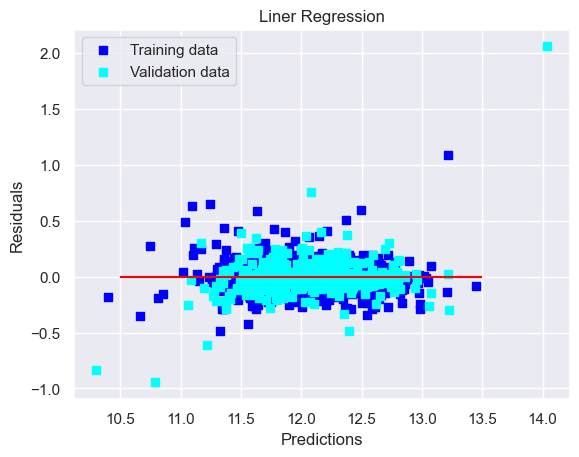

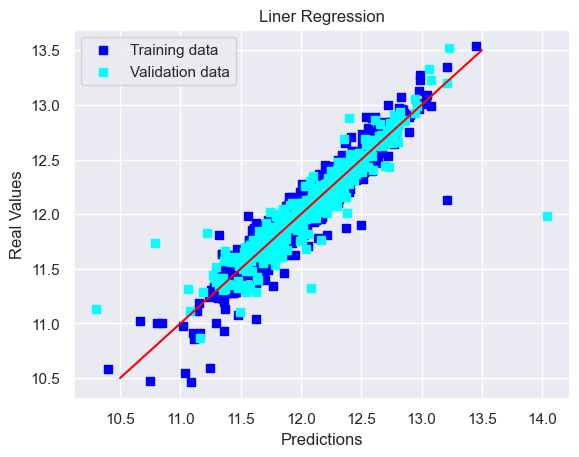

In [97]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 

lr.fit(X_train, y_train)

print("RMSE on Training Set", np.round(rmse_cv_train(lr).mean(), 2))
print("RMSE on Testing Set", np.round(rmse_cv_test(lr).mean(), 2))

#Predictions 
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

#Residual Plotting
plt.scatter(y_train_pred, y_train_pred-y_train, c = "blue", marker = "s", label = "Training data")



plt.scatter(y_test_pred, y_test_pred-y_test, c = "cyan", marker = "s", label = "Validation data")

plt.title("Liner Regression")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()



#Prediciton Plotting

plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")



plt.scatter(y_test_pred, y_test, c = "cyan", marker = "s", label = "Validation data")

plt.title("Liner Regression")
plt.xlabel("Predictions")
plt.ylabel("Real Values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()




RMSE on Testing set shows up weird here for some reason.Errors seem randomly distributed and randomly scattered around the centerline, so there is that at least. It means our model was able to capture most of the explanatory information

In [98]:
#Just showcasing the outputs of N Folded Cross Validation RMSE
print(np.sqrt(-cross_val_score(lr, X_train, y_train, scoring=score, cv=10)))

[0.10777013 0.77537088 0.142006   0.13624652 0.15495431 0.13389894
 0.10997273 0.1216791  0.11556834 0.12402743]


<h5> Linear Regression with Ridge Regularization</h5>

From the Python Machine Learning book by Sebastian Raschka : Regularization is a very useful method to handle collinearity, filter out noise from data, and eventually prevent overfitting. The concept behind regularization is to introduce additional information (bias) to penalize extreme parameter weights.

Ridge regression is an L2 penalized model where we simply add the squared sum of the weights to our cost function.

Best Alpha 60.0
 We will try again for more precision with alphas centered around 60.0
Best Alpha 84.0
RMSE on Training Set 0.13
RMSE on Testing Set 0.16


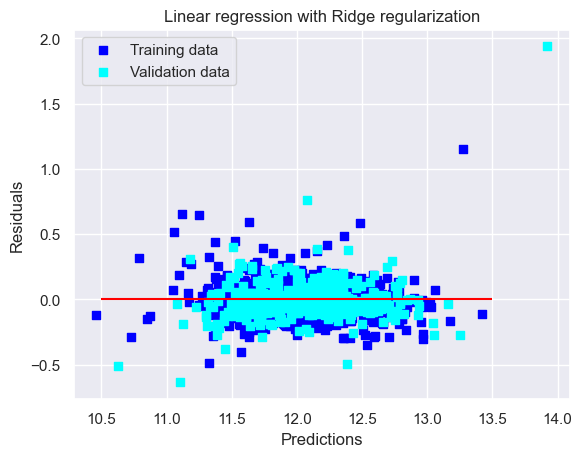

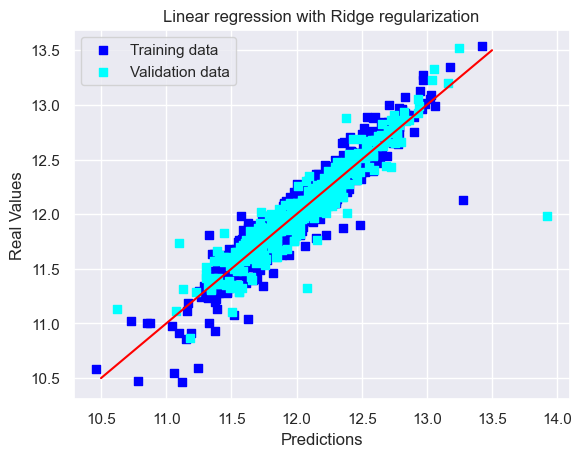

Ridge picked 69 features and eliminated the other 0 features


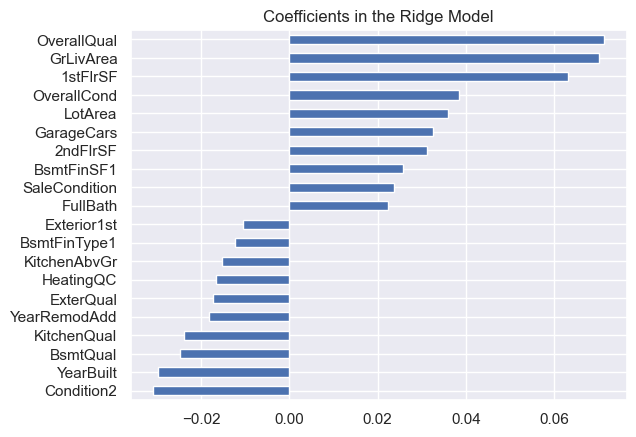

In [99]:
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas = [0.001, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])

ridge.fit(X_train, y_train)


alpha = ridge.alpha_ 

print("Best Alpha", alpha)


print(" We will try again for more precision with alphas centered around " + str(alpha))

ridge = RidgeCV(alphas = [alpha * 0.001, alpha * 0.01, alpha*0.1, alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], cv=10)

ridge.fit(X_train, y_train)


alpha = ridge.alpha_ 

print("Best Alpha", alpha)

print("RMSE on Training Set", np.round(rmse_cv_train(ridge).mean(), 2))
print("RMSE on Testing Set", np.round(rmse_cv_test(ridge).mean(), 2))


y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)



#Residual Plotting
plt.scatter(y_train_pred, y_train_pred-y_train, c = "blue", marker = "s", label = "Training data")



plt.scatter(y_test_pred, y_test_pred-y_test, c = "cyan", marker = "s", label = "Validation data")

plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()



#Prediciton Plotting

plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")



plt.scatter(y_test_pred, y_test, c = "cyan", marker = "s", label = "Validation data")

plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predictions")
plt.ylabel("Real Values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()


coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

We're getting a much better RMSE result now that we've added regularization. The very small difference between training and test results indicate that we eliminated most of the overfitting. Visually, the graphs seem to confirm that idea. Ridge used almost all of the existing features.

<h5> Linear Regression with Lasso Regularization</h5>

LASSO stands for Least Absolute Shrinkage and Selection Operator. It is an alternative regularization method, where we simply replace the square of the weights by the sum of the absolute value of the weights. In contrast to L2 regularization, L1 regularization yields sparse feature vectors : most feature weights will be zero. Sparsity can be useful in practice if we have a high dimensional dataset with many features that are irrelevant

Best Alpha 0.006
 We will try again for more precision with alphas centered around 0.006
Best Alpha 0.006
RMSE on Training Set 0.13
RMSE on Testing Set 0.16


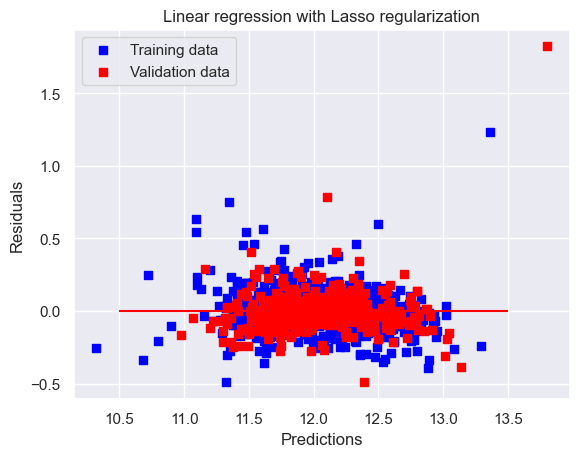

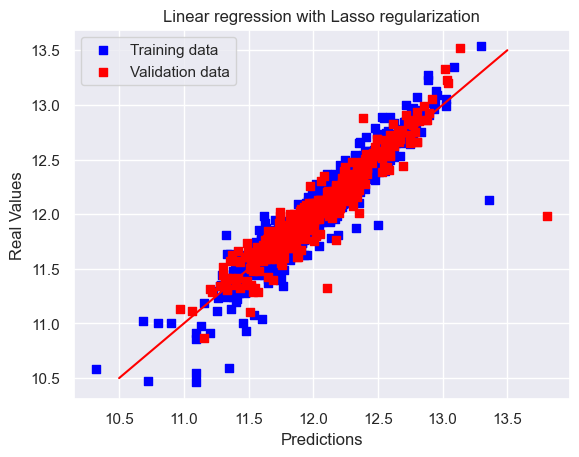

Ridge picked 41 features and eliminated the other 28 features


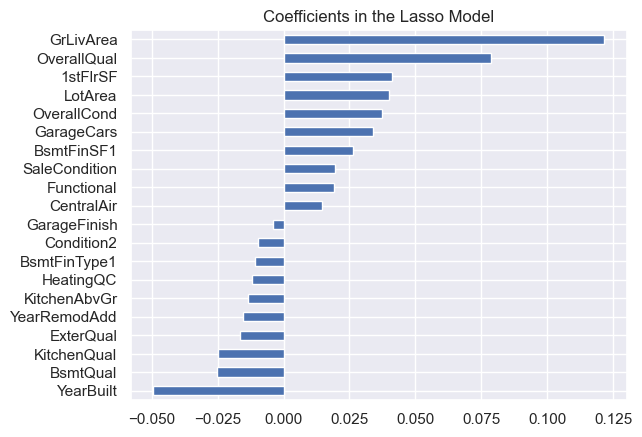

In [100]:
from sklearn.linear_model import LassoCV


lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], max_iter=10000, cv=10)

lasso.fit(X_train, y_train)


alpha = lasso.alpha_ 

print("Best Alpha", alpha)


print(" We will try again for more precision with alphas centered around " + str(alpha))

lasso = LassoCV(alphas = [alpha * 0.001, alpha * 0.01, alpha*0.1, alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], max_iter=10000, cv=10)

lasso.fit(X_train, y_train)


alpha = lasso.alpha_ 

print("Best Alpha", alpha)

print("RMSE on Training Set", np.round(rmse_cv_train(lasso).mean(), 2))
print("RMSE on Testing Set", np.round(rmse_cv_test(lasso).mean(), 2))


y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)



#Residual Plotting
plt.scatter(y_train_pred, y_train_pred-y_train, c = "blue", marker = "s", label = "Training data")



plt.scatter(y_test_pred, y_test_pred-y_test, c = "red", marker = "s", label = "Validation data")

plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()



#Prediciton Plotting

plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")



plt.scatter(y_test_pred, y_test, c = "red", marker = "s", label = "Validation data")

plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predictions")
plt.ylabel("Real Values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()


coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

RMSE results are better both on training and test sets. The most interesting thing is that Lasso used only one third of the available features. Another interesting tidbit : it seems to give big weights to GrLivArea categories, both in positive and negative ways

<h5> Linear Regression with ElasticNetCV Regularization</h5>

Best Alpha 0.06
Best L1 Ratio 0.1
 We will try again for more precision with L1 Ratio centered around 0.06
Best Alpha 0.054
RMSE on Training Set 0.13
RMSE on Testing Set 0.16


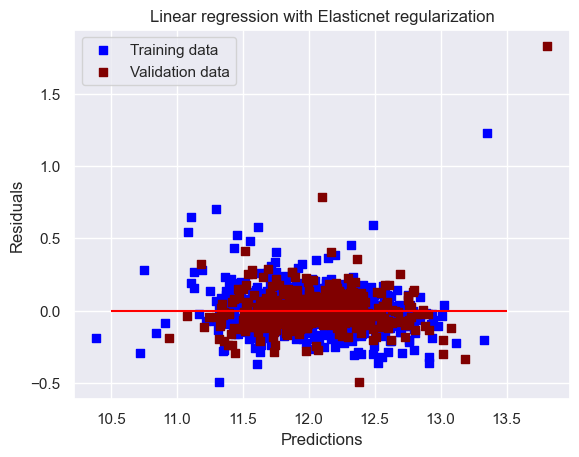

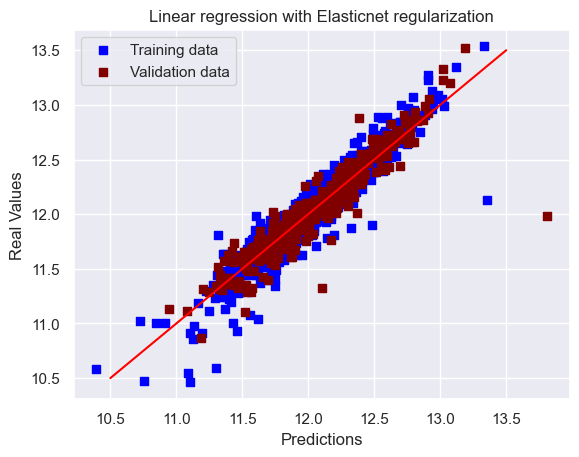

Ridge picked 48 features and eliminated the other 21 features


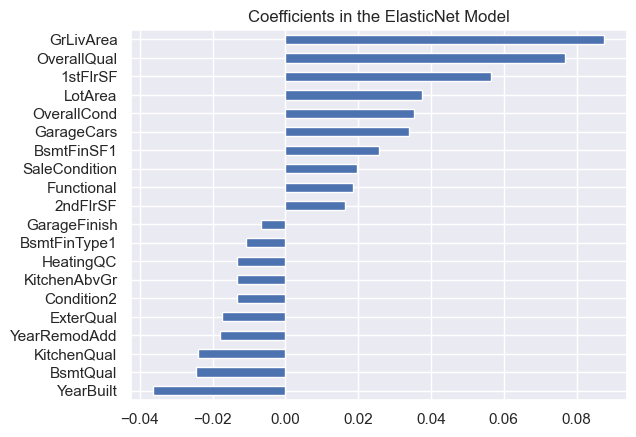

In [102]:
from sklearn.linear_model import ElasticNetCV


elasticnet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1, 3, 6], max_iter=10000, cv=10)

elasticnet.fit(X_train, y_train)


alpha = elasticnet.alpha_ 
ratio = elasticnet.l1_ratio_
print("Best Alpha", alpha)
print("Best L1 Ratio", ratio)

print(" We will try again for more precision with L1 Ratio centered around " + str(alpha))

elasticnet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [alpha * 0.001, alpha * 0.01, alpha*0.1, alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], max_iter=10000, cv=10)

elasticnet.fit(X_train, y_train)


alpha = elasticnet.alpha_ 

print("Best Alpha", alpha)

print("RMSE on Training Set", np.round(rmse_cv_train(elasticnet).mean(), 2))
print("RMSE on Testing Set", np.round(rmse_cv_test(elasticnet).mean(), 2))


y_train_pred = elasticnet.predict(X_train)
y_test_pred = elasticnet.predict(X_test)



#Residual Plotting
plt.scatter(y_train_pred, y_train_pred-y_train, c = "blue", marker = "s", label = "Training data")



plt.scatter(y_test_pred, y_test_pred-y_test, c = "maroon", marker = "s", label = "Validation data")

plt.title("Linear regression with Elasticnet regularization")
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()



#Prediciton Plotting

plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")



plt.scatter(y_test_pred, y_test, c = "maroon", marker = "s", label = "Validation data")

plt.title("Linear regression with Elasticnet regularization")
plt.xlabel("Predictions")
plt.ylabel("Real Values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()


coefs = pd.Series(elasticnet.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")
plt.show()

The optimal L1 ratio used by ElasticNet here is equal to 1, which means it is exactly equal to the Lasso regressor we used earlier (and had it been equal to 0, it would have been exactly equal to our Ridge regressor). The model didn't need any L2 regularization to overcome any potential L1 shortcoming.

Note : We tried to remove the "YearBuilt" feature, it resulted in a slightly worse CV score, but slightly better public LB score.

<h3>Thank You </h3>